<a href="https://colab.research.google.com/github/Hariharapanda-Deepak/regression_transportation-demand-prediction/blob/main/regression_Transportation_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [287]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math
from datetime import datetime
import calendar
import scipy.stats as stat
import pylab

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from joblib import parallel, delayed
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [288]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [289]:
# Importing Data
path='/content/drive/MyDrive/regression project/'
df=pd.read_csv(path + 'train_revised.csv')

In [290]:
df

ride_id seat_number payment_method payment_receipt travel_date  \
0         1442         15A          Mpesa      UZUEHCBUSO    17-10-17   
1         5437         14A          Mpesa      TIHLBUSGTE    19-11-17   
2         5710          8B          Mpesa      EQX8Q5G19O    26-11-17   
3         5777         19A          Mpesa      SGP18CL0ME    27-11-17   
4         5778         11A          Mpesa      BM97HFRGL9    27-11-17   
...        ...         ...            ...             ...         ...   
51640    13826          9B          Mpesa      8V2XDDZR6V    20-04-18   
51641    13809         18A          Mpesa      4PEBSVJSNK    20-04-18   
51642    13809         17A          Mpesa      LVN64LZDNN    20-04-18   
51643    13796         16B          Mpesa      REYBSKTYWN    20-04-18   
51644    14304           7          Mpesa      AQN7FBUSGP    14-11-17   

      travel_time travel_from travel_to car_type  max_capacity  
0            7:15      Migori   Nairobi      Bus            49  
1            7:12      Migori   Nairobi      Bus            49  
2            7:05      Keroka   Nairobi      Bus            49  
3            7:10    Homa Bay   Nairobi      Bus            49  
4            7:12      Migori   Nairobi      Bus            49  
...           ...         ...       ...      ...           ...  
51640        8:00      Awendo   Nairobi      Bus            49  
51641        8:00      Migori   Nairobi      Bus            49  
51642        8:00      Migori   Nairobi      Bus            49  
51643        7:08      Awendo   Nairobi      Bus            49  
51644        5:10       Kisii   Nairobi      Bus            49  

[51645 rows x 10 columns]

In [291]:
data_df=df.copy()

# Exploratory Data Analysis

In [292]:

df.shape

(51645, 10)

In [293]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [295]:
# Checking for duplicates
duplicate_rows=df[df.duplicated()]

In [296]:
duplicate_rows

Empty DataFrame
Columns: [ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity]
Index: []

In [297]:


# Checking null values
df.isna().sum().sort_values(ascending=False)

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [298]:
df.describe(include='object')

seat_number payment_method payment_receipt travel_date travel_time  \
count        51645          51645           51645       51645       51645   
unique          61              2           51645         149          78   
top              1          Mpesa      UZUEHCBUSO    10-12-17        7:09   
freq          2065          51532               1         856        3926   

       travel_from travel_to car_type  
count        51645     51645    51645  
unique          17         1        2  
top          Kisii   Nairobi      Bus  
freq         22607     51645    31985

In [299]:


df.describe()

ride_id  max_capacity
count  51645.000000  51645.000000
mean   10188.645793     34.534321
std     2211.295708     18.451193
min     1442.000000     11.000000
25%     8287.000000     11.000000
50%    10353.000000     49.000000
75%    12029.000000     49.000000
max    20117.000000     49.000000

#Prefered payment Method

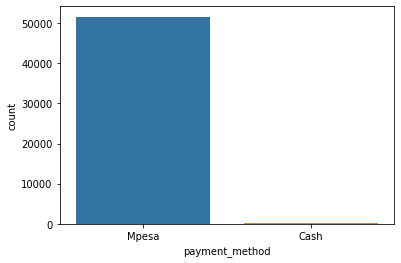

In [300]:
sns.countplot(df['payment_method'])
plt.show()

# Prefered Car Type

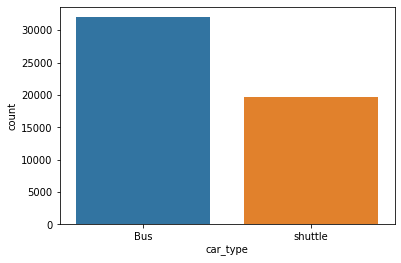

In [301]:
sns.countplot(df['car_type'])
plt.show()

# Preffered Capacity of Vehicle

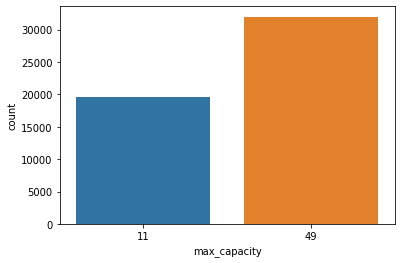

In [302]:
sns.countplot(df['max_capacity'])
plt.show()



# Creating Column for Target variable ("number of ticket") 

In [303]:
Ticket_df=df.groupby(["ride_id","travel_date","travel_time","max_capacity","travel_from"]).seat_number.count().rename("number_of_ticket").reset_index()
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442    17-10-17        7:15            49      Migori   
1        5437    19-11-17        7:12            49      Migori   
2        5710    26-11-17        7:05            49      Keroka   
3        5777    27-11-17        7:10            49    Homa Bay   
4        5778    27-11-17        7:12            49      Migori   
...       ...         ...         ...           ...         ...   
6244    20113    07-02-18        7:00            11       Kisii   
6245    20114    12-12-17        7:10            49       Kisii   
6246    20115    06-12-17        7:10            11       Kisii   
6247    20116    27-11-17        7:10            11       Kisii   
6248    20117    27-11-17        5:00            49       Kisii   

      number_of_ticket  
0                    1  
1                    1  
2                    1  
3                    5  
4                   31  
...                ...  
6244                 9  
6245                 4  
6246                 5  
6247                 1  
6248                 1  

[6249 rows x 6 columns]

In [304]:
Ticket_df['travel_date']=pd.to_datetime(Ticket_df['travel_date'], format='%d-%m-%y')

In [305]:
Ticket_df=Ticket_df.sort_values(by='travel_date')

Finding time taken for next bus/shuttle

In [306]:
city_names=list(Ticket_df['travel_from'].unique())
for city in city_names:
  xdf=pd.DataFrame()
  xdf=Ticket_df[Ticket_df['travel_from'].str.contains(city)]
  xdf['Next bus Date'] = xdf['travel_date'].shift(-1)
  xdf['Waiting_time'] = xdf['Next bus Date'] - xdf['travel_date']
  Ticket_df[city]=xdf['Waiting_time']

In [307]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  Migori   Kisii Keroka Homa Bay  ... Awendo Oyugis  \
0                    1 33 days     NaT    NaT      NaT  ...    NaT    NaT   
6241                 1     NaT 13 days    NaT      NaT  ...    NaT    NaT   
1                    1  8 days     NaT    NaT      NaT  ...    NaT    NaT   
2                    1     NaT     NaT 1 days      NaT  ...    NaT    NaT   
5962                11     NaT  0 days    NaT      NaT  ...    NaT    NaT   
...                ...     ...     ...    ...      ...  ...    ...    ...   
6222                 2     NaT     NaT    NaT      NaT  ...    NaT    NaT   
6223                 2     NaT     NaT    NaT      NaT  ...    NaT    NaT   
6225                 1     NaT     NaT    NaT      NaT  ...    NaT    NaT   
6215                20     NaT     NaT    NaT      NaT  ...    NaT    NaT   
6219                12     NaT     NaT    NaT      NaT  ...    NaT    NaT   

     Sirare Kehancha Nyachenge Kendu Bay Sori Rodi Mbita Ndhiwa  
0       NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6241    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
1       NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
2       NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
5962    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
...     ...      ...       ...       ...  ...  ...   ...    ...  
6222    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6223    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6225    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6215    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6219    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  

[6249 rows x 23 columns]

In [308]:

Ticket_df.columns

Index(['ride_id', 'travel_date', 'travel_time', 'max_capacity', 'travel_from',
       'number_of_ticket', 'Migori', 'Kisii', 'Keroka', 'Homa Bay', 'Keumbu',
       'Rongo', 'Kijauri', 'Awendo', 'Oyugis', 'Sirare', 'Kehancha',
       'Nyachenge', 'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'],
      dtype='object')

In [309]:
dummies = pd.get_dummies(Ticket_df[city_names])

In [310]:
dummies

Migori   Kisii Keroka Homa Bay Keumbu Rongo Kijauri Awendo Oyugis  \
0    33 days     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
6241     NaT 13 days    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
1     8 days     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
2        NaT     NaT 1 days      NaT    NaT   NaT     NaT    NaT    NaT   
5962     NaT  0 days    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
...      ...     ...    ...      ...    ...   ...     ...    ...    ...   
6222     NaT     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
6223     NaT     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
6225     NaT     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
6215     NaT     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
6219     NaT     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   

     Sirare Kehancha Nyachenge Kendu Bay Sori Rodi Mbita Ndhiwa  
0       NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6241    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
1       NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
2       NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
5962    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
...     ...      ...       ...       ...  ...  ...   ...    ...  
6222    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6223    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6225    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6215    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6219    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  

[6249 rows x 17 columns]

In [311]:
Ticket_df['Waiting_time']=dummies.max(axis=1)

In [312]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  Migori   Kisii Keroka Homa Bay  ... Oyugis Sirare  \
0                    1 33 days     NaT    NaT      NaT  ...    NaT    NaT   
6241                 1     NaT 13 days    NaT      NaT  ...    NaT    NaT   
1                    1  8 days     NaT    NaT      NaT  ...    NaT    NaT   
2                    1     NaT     NaT 1 days      NaT  ...    NaT    NaT   
5962                11     NaT  0 days    NaT      NaT  ...    NaT    NaT   
...                ...     ...     ...    ...      ...  ...    ...    ...   
6222                 2     NaT     NaT    NaT      NaT  ...    NaT    NaT   
6223                 2     NaT     NaT    NaT      NaT  ...    NaT    NaT   
6225                 1     NaT     NaT    NaT      NaT  ...    NaT    NaT   
6215                20     NaT     NaT    NaT      NaT  ...    NaT    NaT   
6219                12     NaT     NaT    NaT      NaT  ...    NaT    NaT   

     Kehancha Nyachenge Kendu Bay Sori Rodi Mbita Ndhiwa Waiting_time  
0         NaT       NaT       NaT  NaT  NaT   NaT    NaT      33 days  
6241      NaT       NaT       NaT  NaT  NaT   NaT    NaT      13 days  
1         NaT       NaT       NaT  NaT  NaT   NaT    NaT       8 days  
2         NaT       NaT       NaT  NaT  NaT   NaT    NaT       1 days  
5962      NaT       NaT       NaT  NaT  NaT   NaT    NaT       0 days  
...       ...       ...       ...  ...  ...   ...    ...          ...  
6222      NaT       NaT       NaT  NaT  NaT   NaT    NaT          NaT  
6223      NaT       NaT       NaT  NaT  NaT   NaT    NaT          NaT  
6225      NaT       NaT       NaT  NaT  NaT   NaT    NaT          NaT  
6215      NaT       NaT       NaT  NaT  NaT   NaT    NaT          NaT  
6219      NaT       NaT       NaT  NaT  NaT   NaT    NaT          NaT  

[6249 rows x 24 columns]

In [313]:
Ticket_df.drop(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu',
       'Rongo', 'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge',
       'Kehancha', 'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], axis=1, inplace=True)

In [314]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket Waiting_time  
0                    1      33 days  
6241                 1      13 days  
1                    1       8 days  
2                    1       1 days  
5962                11       0 days  
...                ...          ...  
6222                 2          NaT  
6223                 2          NaT  
6225                 1          NaT  
6215                20          NaT  
6219                12          NaT  

[6249 rows x 7 columns]

# Most preffered Travel Time

In [315]:
traveled_time_counts=Ticket_df.groupby('travel_time')['number_of_ticket'].count()

In [316]:
traveled_time_counts

travel_time
10:00    67
10:10    60
10:20    64
10:30    56
10:40    56
         ..
9:10     86
9:20     84
9:30     81
9:40     77
9:50     78
Name: number_of_ticket, Length: 78, dtype: int64

In [317]:

traveled_time_counts=traveled_time_counts.sort_index(ascending=True)

In [318]:
traveled_time_counts

travel_time
10:00    67
10:10    60
10:20    64
10:30    56
10:40    56
         ..
9:10     86
9:20     84
9:30     81
9:40     77
9:50     78
Name: number_of_ticket, Length: 78, dtype: int64

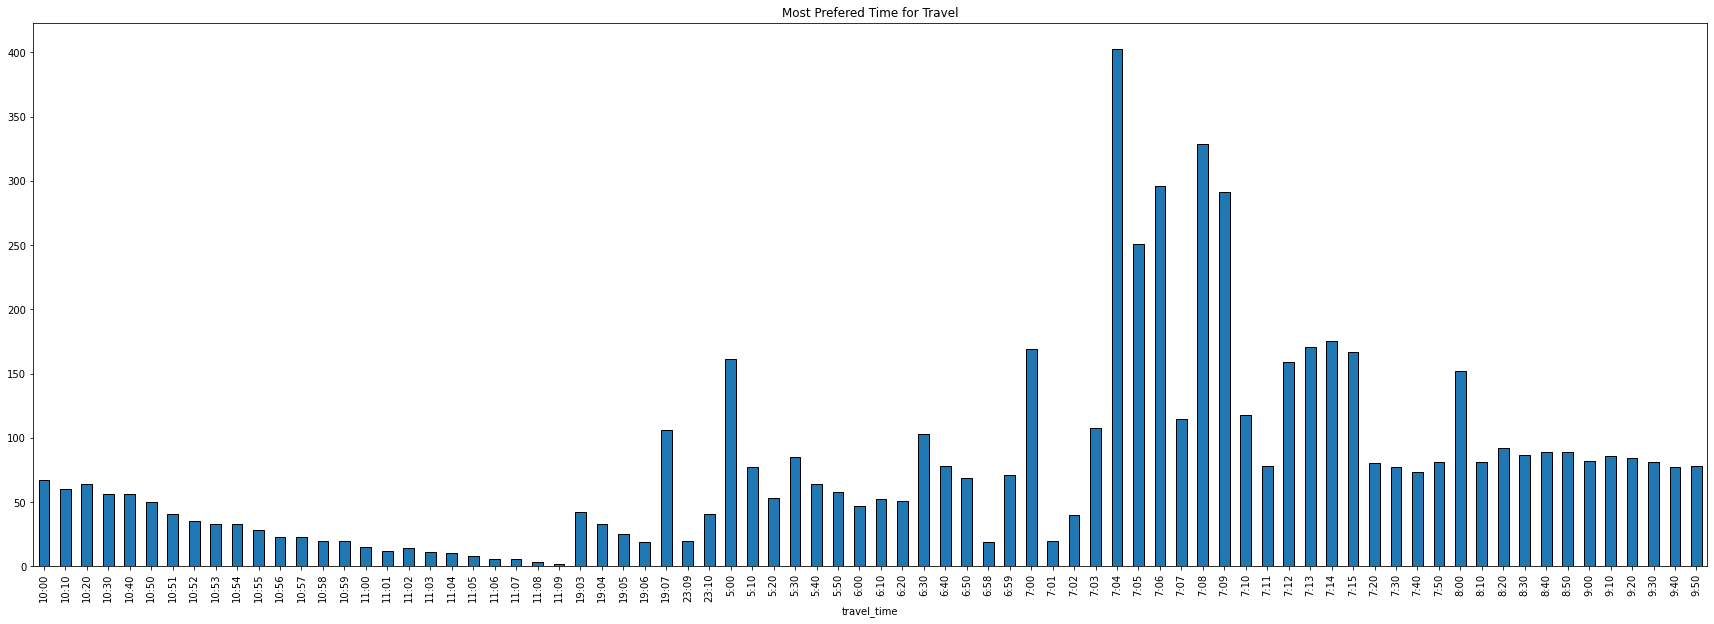

In [319]:

#Bar Plot between most preffered time vs number of tickets
traveled_time_counts.plot(kind='bar',edgecolor='black',linewidth=1,figsize=(30,10),title='Most Prefered Time for Travel')

# Trend of Booking

In [320]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket Waiting_time  
0                    1      33 days  
6241                 1      13 days  
1                    1       8 days  
2                    1       1 days  
5962                11       0 days  
...                ...          ...  
6222                 2          NaT  
6223                 2          NaT  
6225                 1          NaT  
6215                20          NaT  
6219                12          NaT  

[6249 rows x 7 columns]

In [321]:
Ticket_df['year']=Ticket_df['travel_date'].dt.year
Ticket_df['month']=Ticket_df['travel_date'].dt.month
Ticket_df['day']=Ticket_df['travel_date'].dt.day

Ticket_df['weekday']=Ticket_df['travel_date'].dt.day_name()

In [322]:

Ticket_df['travel_date']=pd.to_datetime(Ticket_df['travel_date'])


In [323]:
traveled_date_counts=Ticket_df.groupby('travel_date')['number_of_ticket'].count()

In [324]:
traveled_date_counts

travel_date
2017-10-17     1
2017-11-14     1
2017-11-19     1
2017-11-26     1
2017-11-27    47
              ..
2018-04-16    50
2018-04-17    45
2018-04-18    45
2018-04-19    42
2018-04-20    41
Name: number_of_ticket, Length: 149, dtype: int64

In [325]:
b=dict(traveled_date_counts)

In [326]:
x=list(b.keys())
y=list(b.values())

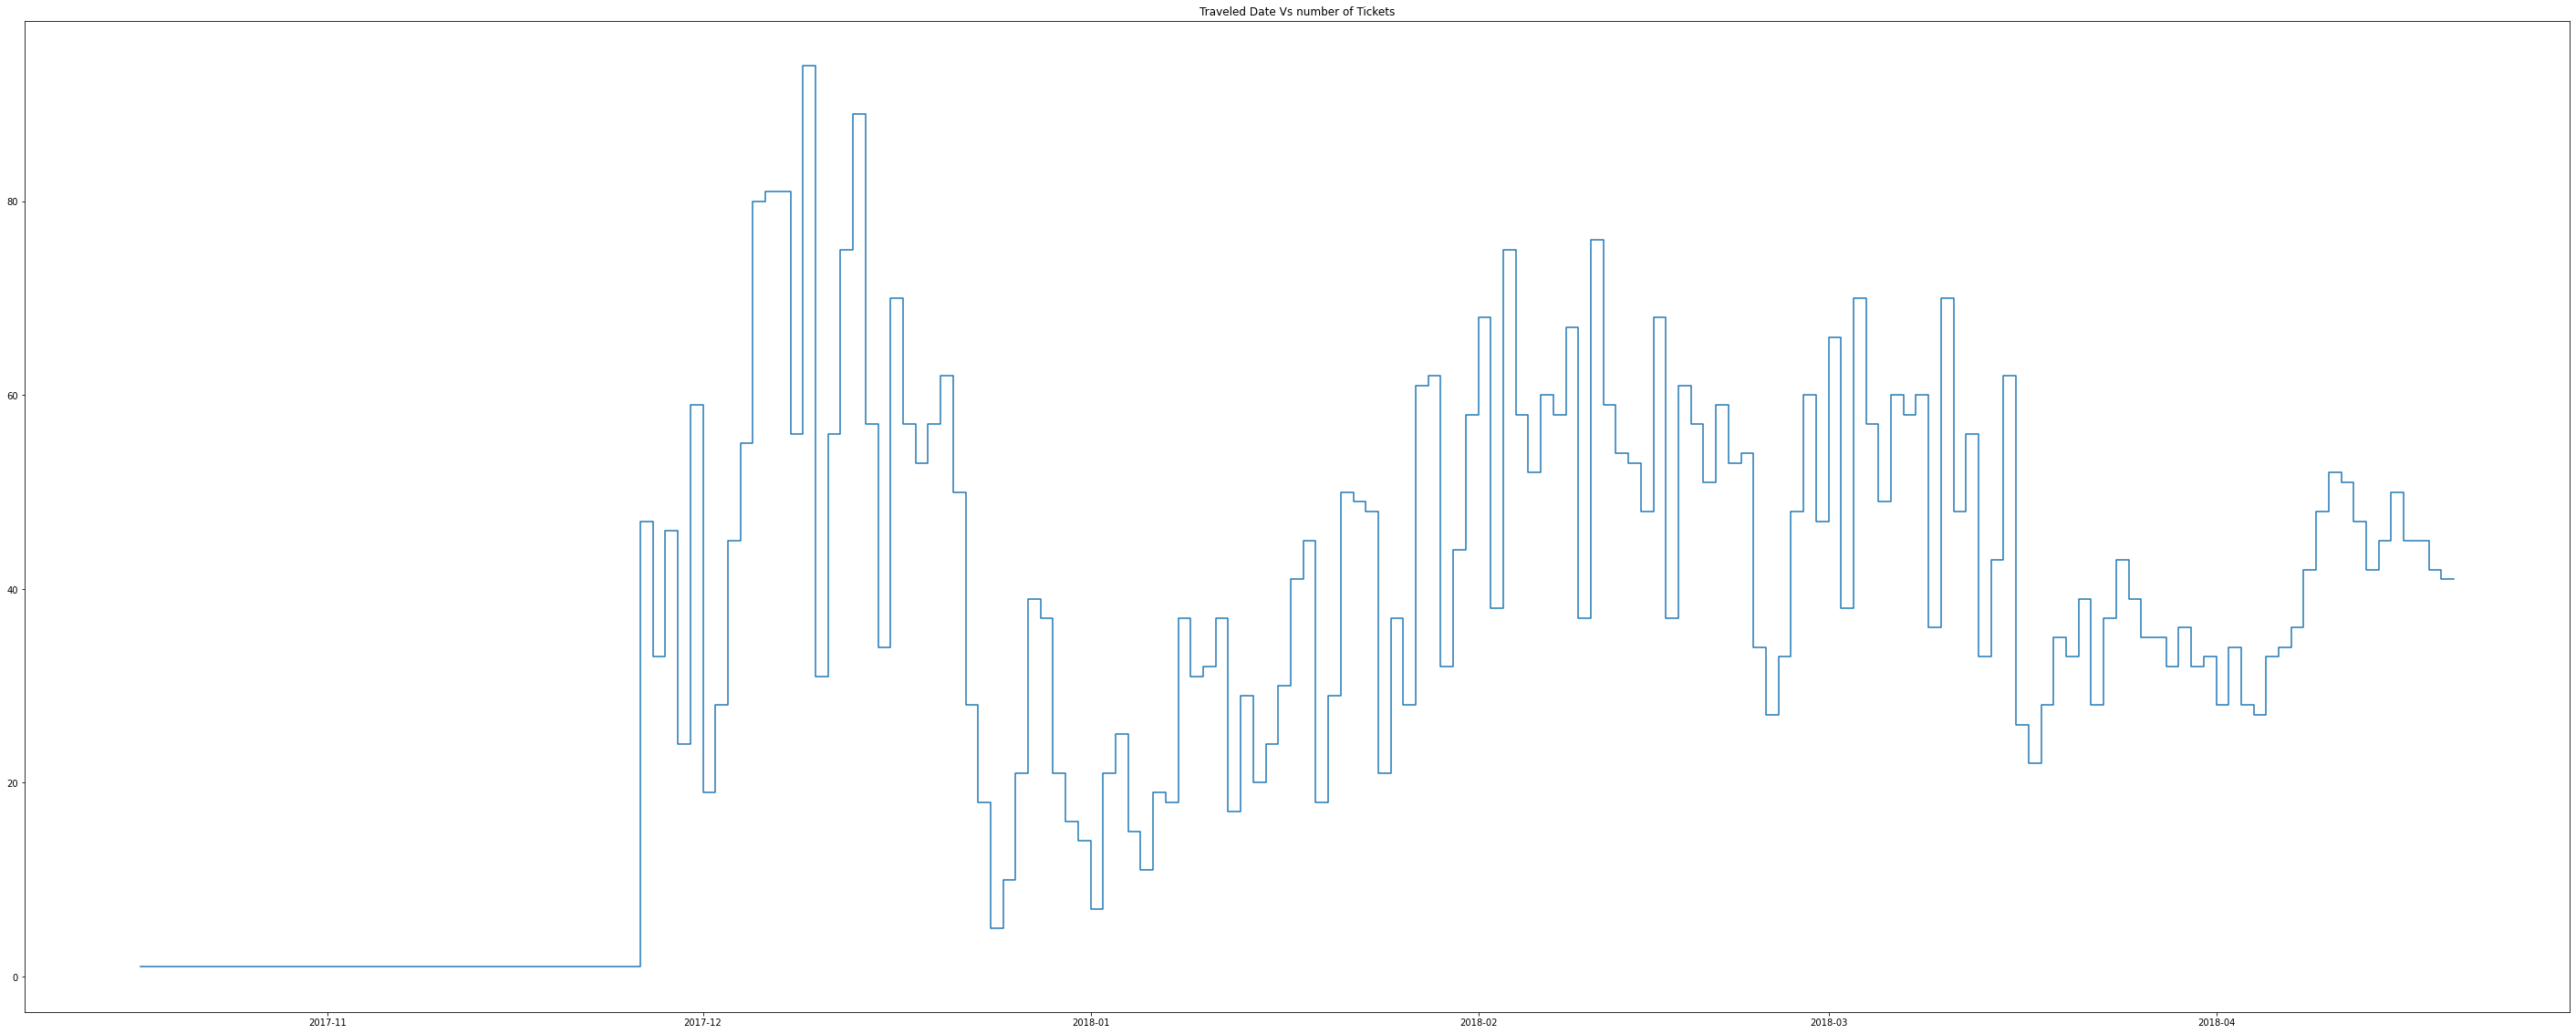

In [327]:
# step plot of travelled date vs number of tickets
plt.figure(figsize=(50,20))
plt.step(x,y)
plt.title('Traveled Date Vs number of Tickets')
plt.show()


In [328]:

Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket Waiting_time  year  month  day  weekday  
0                    1      33 days  2017     10   17  Tuesday  
6241                 1      13 days  2017     11   14  Tuesday  
1                    1       8 days  2017     11   19   Sunday  
2                    1       1 days  2017     11   26   Sunday  
5962                11       0 days  2017     11   27   Monday  
...                ...          ...   ...    ...  ...      ...  
6222                 2          NaT  2018      4   20   Friday  
6223                 2          NaT  2018      4   20   Friday  
6225                 1          NaT  2018      4   20   Friday  
6215                20          NaT  2018      4   20   Friday  
6219                12          NaT  2018      4   20   Friday  

[6249 rows x 11 columns]

Weekday count

In [329]:
weekday_count=Ticket_df.groupby('weekday')['number_of_ticket'].count()

In [330]:
weekday_count

weekday
Friday       1048
Monday        848
Saturday      623
Sunday        924
Thursday      970
Tuesday       865
Wednesday     971
Name: number_of_ticket, dtype: int64

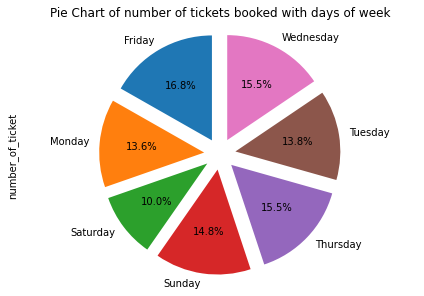

In [331]:
weekday_count.plot.pie(y=Ticket_df.index,
           shadow=False,
           explode=(0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.title('Pie Chart of number of tickets booked with days of week')
plt.show()

In [332]:
Ticket_df['weekday']=Ticket_df['weekday'].replace(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],[1,2,3,4,5,6,7])



# Month wise booking Analysis

In [333]:
Ticket_df['Month'] = Ticket_df['month'].apply(lambda x: calendar.month_abbr[x])

In [334]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket Waiting_time  year  month  day  weekday Month  
0                    1      33 days  2017     10   17        2   Oct  
6241                 1      13 days  2017     11   14        2   Nov  
1                    1       8 days  2017     11   19        7   Nov  
2                    1       1 days  2017     11   26        7   Nov  
5962                11       0 days  2017     11   27        1   Nov  
...                ...          ...   ...    ...  ...      ...   ...  
6222                 2          NaT  2018      4   20        5   Apr  
6223                 2          NaT  2018      4   20        5   Apr  
6225                 1          NaT  2018      4   20        5   Apr  
6215                20          NaT  2018      4   20        5   Apr  
6219                12          NaT  2018      4   20        5   Apr  

[6249 rows x 12 columns]

In [335]:
month_count=Ticket_df.groupby('Month')['number_of_ticket'].count()

In [336]:
month_count=dict(month_count)

In [337]:
x=month_count.keys()
x=list(x)
y=month_count.values()
y=list(y)

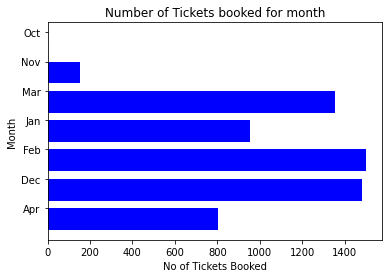

In [338]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Number of Tickets booked for month')
plt.xlabel('No of Tickets Booked')
plt.ylabel('Month')      
plt.show()



Bus Starting location Analysis

In [339]:
travel_starting=Ticket_df.groupby('travel_from')['number_of_ticket'].count()

In [340]:
travel_starting

travel_from
Awendo        185
Homa Bay      356
Kehancha      172
Kendu Bay       1
Keroka        312
Keumbu         20
Kijauri       556
Kisii        3020
Mbita          21
Migori        386
Ndhiwa         22
Nyachenge     196
Oyugis          2
Rodi           51
Rongo         738
Sirare        191
Sori           20
Name: number_of_ticket, dtype: int64

In [341]:
v=dict(travel_starting)
x=v.keys()
x=list(x)
y=v.values()
y=list(y)

<StemContainer object of 3 artists>

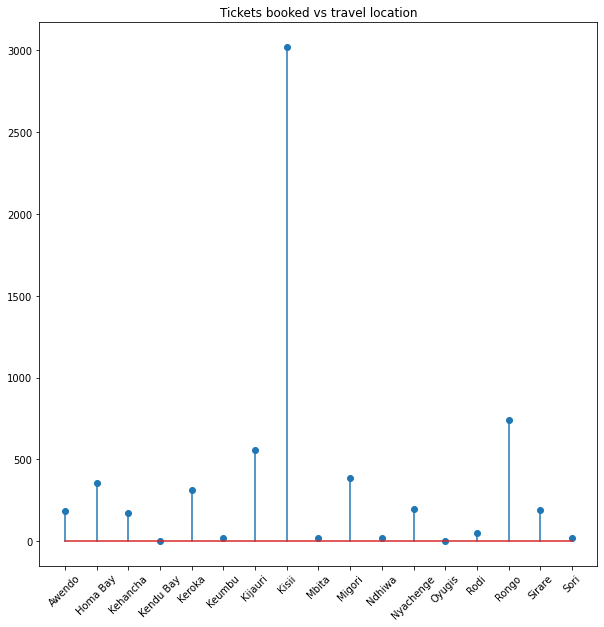

In [342]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
plt.title('Tickets booked vs travel location')
plt.stem(x,y)

In [343]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket Waiting_time  year  month  day  weekday Month  
0                    1      33 days  2017     10   17        2   Oct  
6241                 1      13 days  2017     11   14        2   Nov  
1                    1       8 days  2017     11   19        7   Nov  
2                    1       1 days  2017     11   26        7   Nov  
5962                11       0 days  2017     11   27        1   Nov  
...                ...          ...   ...    ...  ...      ...   ...  
6222                 2          NaT  2018      4   20        5   Apr  
6223                 2          NaT  2018      4   20        5   Apr  
6225                 1          NaT  2018      4   20        5   Apr  
6215                20          NaT  2018      4   20        5   Apr  
6219                12          NaT  2018      4   20        5   Apr  

[6249 rows x 12 columns]

In [344]:

distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
Ticket_df["travel_from_distance"]=Ticket_df.travel_from.map(distance)

In [345]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
Ticket_df["travel_from_time"]=Ticket_df.travel_from.map(time)

In [346]:
Ticket_df["Speed"]=Ticket_df.travel_from_time/Ticket_df.travel_from_distance

In [347]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket Waiting_time  year  month  day  weekday Month  \
0                    1      33 days  2017     10   17        2   Oct   
6241                 1      13 days  2017     11   14        2   Nov   
1                    1       8 days  2017     11   19        7   Nov   
2                    1       1 days  2017     11   26        7   Nov   
5962                11       0 days  2017     11   27        1   Nov   
...                ...          ...   ...    ...  ...      ...   ...   
6222                 2          NaT  2018      4   20        5   Apr   
6223                 2          NaT  2018      4   20        5   Apr   
6225                 1          NaT  2018      4   20        5   Apr   
6215                20          NaT  2018      4   20        5   Apr   
6219                12          NaT  2018      4   20        5   Apr   

      travel_from_distance  travel_from_time     Speed  
0                    370.0               428  1.156757  
6241                 305.1               334  1.094723  
1                    370.0               428  1.156757  
2                    280.0               300  1.071429  
5962                 305.1               334  1.094723  
...                    ...               ...       ...  
6222                 332.0               381  1.147590  
6223                 326.0               370  1.134969  
6225                 271.0               290  1.070111  
6215                 351.0               398  1.133903  
6219                 348.0               400  1.149425  

[6249 rows x 15 columns]

In [348]:
df=Ticket_df

In [349]:
df["travel_time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [350]:
df

ride_id travel_date  travel_time  max_capacity travel_from  \
0        1442  2017-10-17          435            49      Migori   
6241    14304  2017-11-14          310            49       Kisii   
1        5437  2017-11-19          432            49      Migori   
2        5710  2017-11-26          425            49      Keroka   
5962    13477  2017-11-27          600            11       Kisii   
...       ...         ...          ...           ...         ...   
6222    13797  2018-04-20          425            49       Rongo   
6223    13798  2018-04-20          423            49   Nyachenge   
6225    13800  2018-04-20          426            49     Kijauri   
6215    13790  2018-04-20          433            49      Awendo   
6219    13794  2018-04-20         1390            49        Rodi   

      number_of_ticket Waiting_time  year  month  day  weekday Month  \
0                    1      33 days  2017     10   17        2   Oct   
6241                 1      13 days  2017     11   14        2   Nov   
1                    1       8 days  2017     11   19        7   Nov   
2                    1       1 days  2017     11   26        7   Nov   
5962                11       0 days  2017     11   27        1   Nov   
...                ...          ...   ...    ...  ...      ...   ...   
6222                 2          NaT  2018      4   20        5   Apr   
6223                 2          NaT  2018      4   20        5   Apr   
6225                 1          NaT  2018      4   20        5   Apr   
6215                20          NaT  2018      4   20        5   Apr   
6219                12          NaT  2018      4   20        5   Apr   

      travel_from_distance  travel_from_time     Speed  
0                    370.0               428  1.156757  
6241                 305.1               334  1.094723  
1                    370.0               428  1.156757  
2                    280.0               300  1.071429  
5962                 305.1               334  1.094723  
...                    ...               ...       ...  
6222                 332.0               381  1.147590  
6223                 326.0               370  1.134969  
6225                 271.0               290  1.070111  
6215                 351.0               398  1.133903  
6219                 348.0               400  1.149425  

[6249 rows x 15 columns]

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6219
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   ride_id               6249 non-null   int64          
 1   travel_date           6249 non-null   datetime64[ns] 
 2   travel_time           6249 non-null   int64          
 3   max_capacity          6249 non-null   int64          
 4   travel_from           6249 non-null   object         
 5   number_of_ticket      6249 non-null   int64          
 6   Waiting_time          6232 non-null   timedelta64[ns]
 7   year                  6249 non-null   int64          
 8   month                 6249 non-null   int64          
 9   day                   6249 non-null   int64          
 10  weekday               6249 non-null   int64          
 11  Month                 6249 non-null   object         
 12  travel_from_distance  6249 non-null   float64        
 13  tra

In [352]:
df=df.fillna(pd.Timedelta('0 days'))

In [353]:
df["Waiting_time"] = df["Waiting_time"].apply(lambda x: x.days)

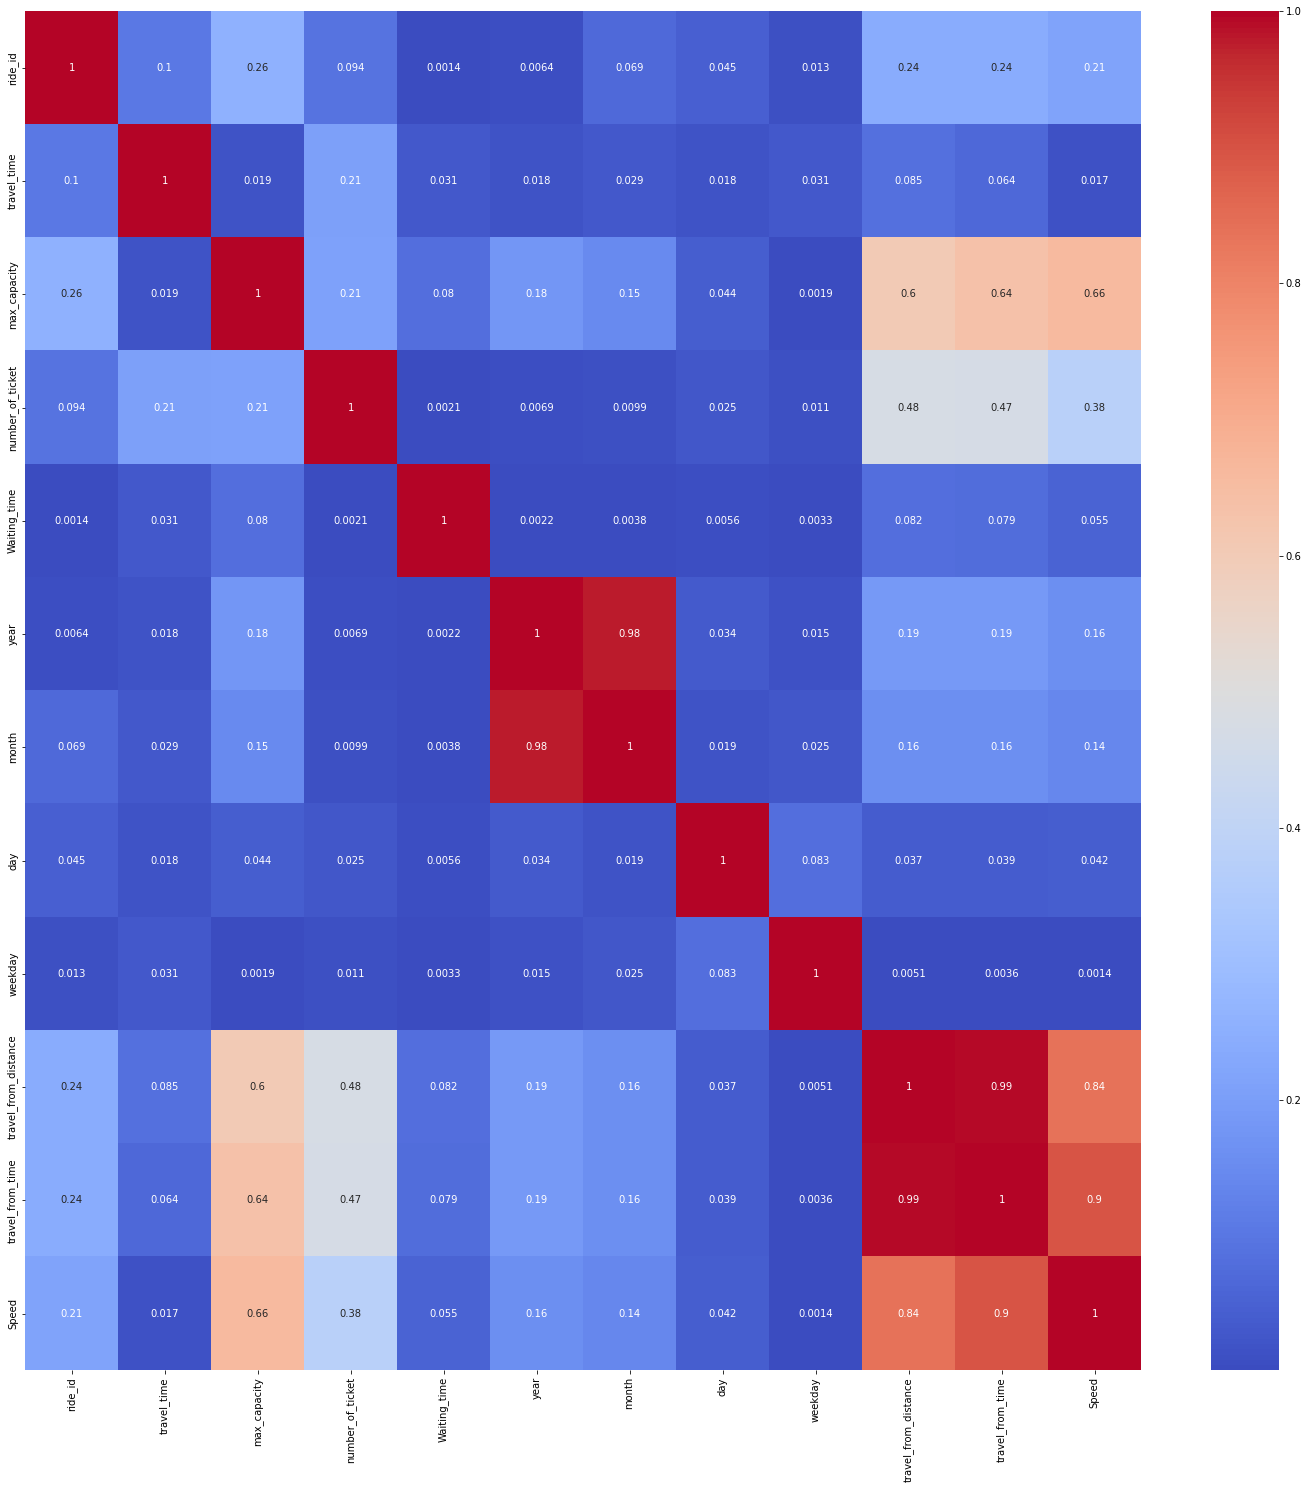

In [354]:
## Correlation
plt.figure(figsize=(25,25))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [355]:
df.drop(['ride_id','year','travel_from_time'], axis=1, inplace=True)

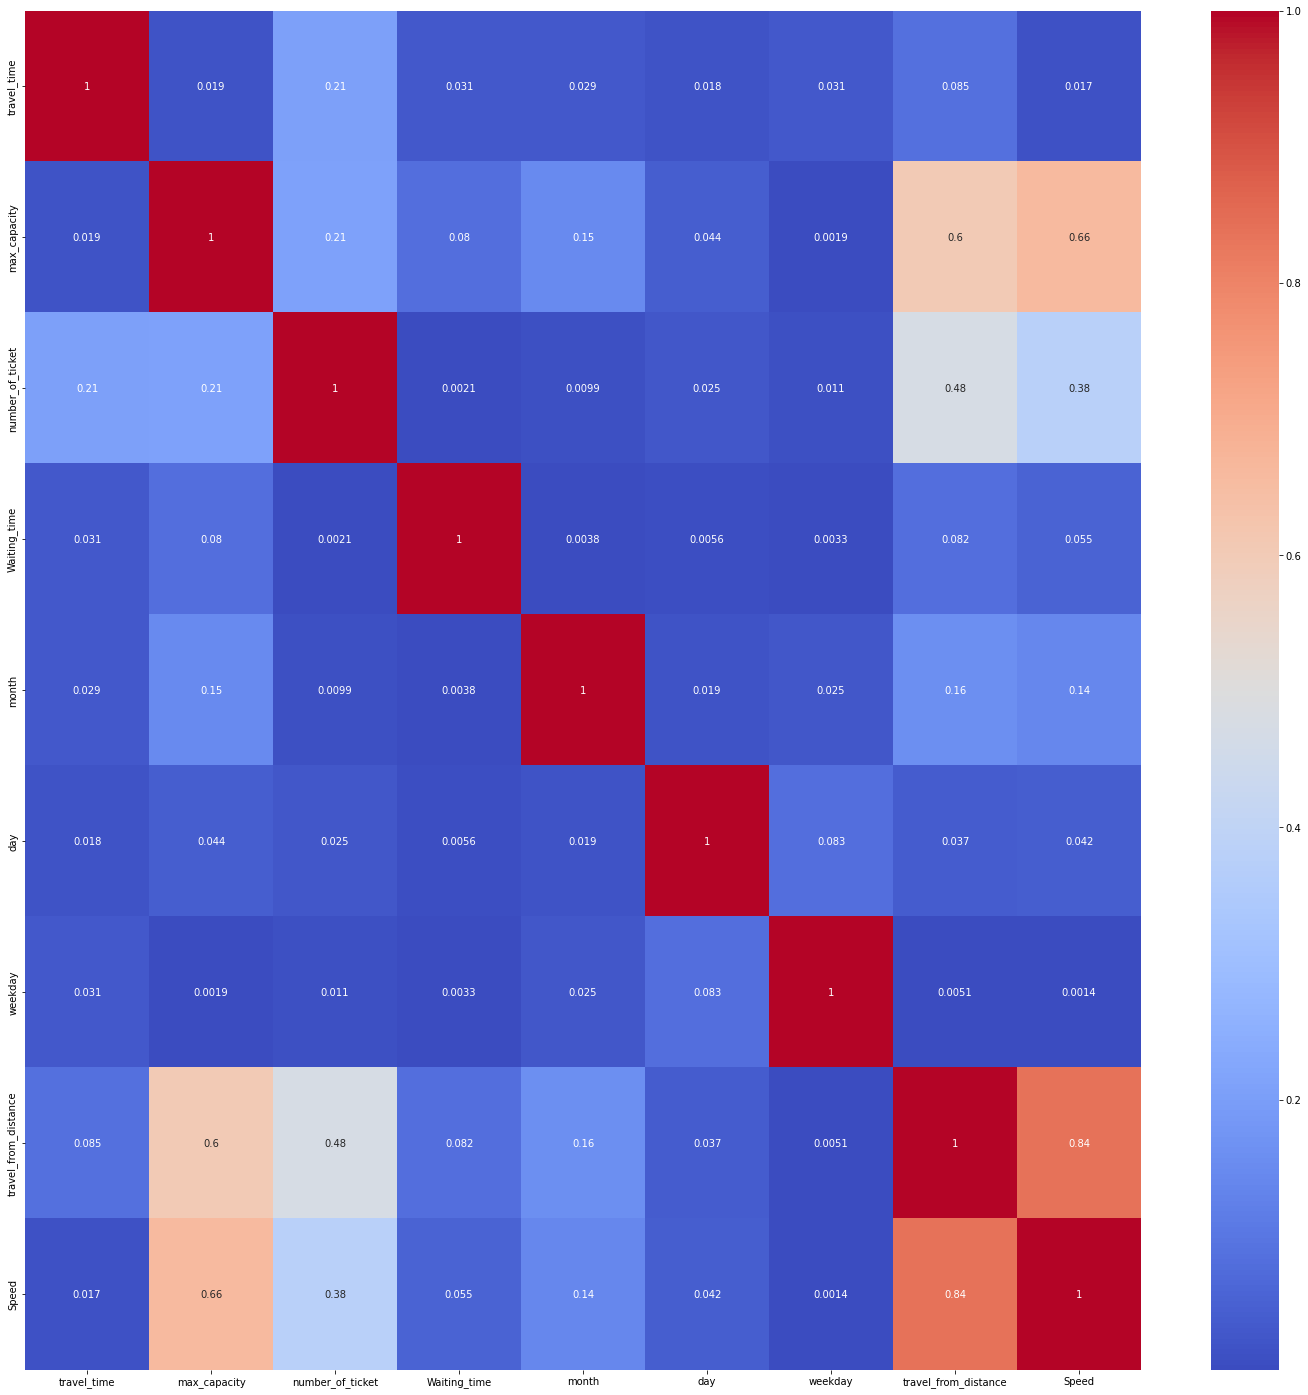

In [356]:
## Correlation
plt.figure(figsize=(25,25))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [357]:
numeric_features = df.describe().columns
numeric_features

Index(['travel_time', 'max_capacity', 'number_of_ticket', 'Waiting_time',
       'month', 'day', 'weekday', 'travel_from_distance', 'Speed'],
      dtype='object')

In [358]:
data=df.copy()

In [359]:
data

travel_date  travel_time  max_capacity travel_from  number_of_ticket  \
0     2017-10-17          435            49      Migori                 1   
6241  2017-11-14          310            49       Kisii                 1   
1     2017-11-19          432            49      Migori                 1   
2     2017-11-26          425            49      Keroka                 1   
5962  2017-11-27          600            11       Kisii                11   
...          ...          ...           ...         ...               ...   
6222  2018-04-20          425            49       Rongo                 2   
6223  2018-04-20          423            49   Nyachenge                 2   
6225  2018-04-20          426            49     Kijauri                 1   
6215  2018-04-20          433            49      Awendo                20   
6219  2018-04-20         1390            49        Rodi                12   

      Waiting_time  month  day  weekday Month  travel_from_distance     Speed  
0               33     10   17        2   Oct                 370.0  1.156757  
6241            13     11   14        2   Nov                 305.1  1.094723  
1                8     11   19        7   Nov                 370.0  1.156757  
2                1     11   26        7   Nov                 280.0  1.071429  
5962             0     11   27        1   Nov                 305.1  1.094723  
...            ...    ...  ...      ...   ...                   ...       ...  
6222             0      4   20        5   Apr                 332.0  1.147590  
6223             0      4   20        5   Apr                 326.0  1.134969  
6225             0      4   20        5   Apr                 271.0  1.070111  
6215             0      4   20        5   Apr                 351.0  1.133903  
6219             0      4   20        5   Apr                 348.0  1.149425  

[6249 rows x 12 columns]

In [360]:
def plot_data(data,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  data[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(data[feature],dist='norm',plot=pylab)
  plt.show()

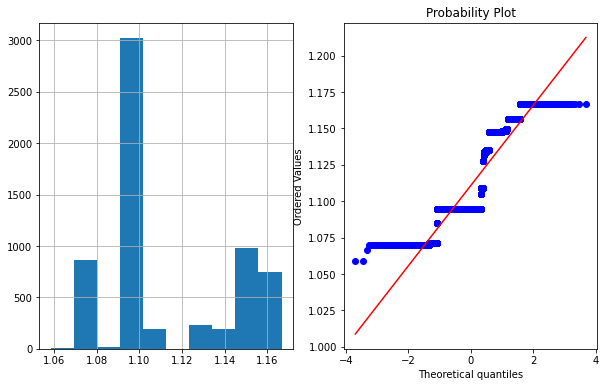

In [361]:
plot_data(data,'Speed')

In [362]:
data['xxx']=np.log10(data.Speed)

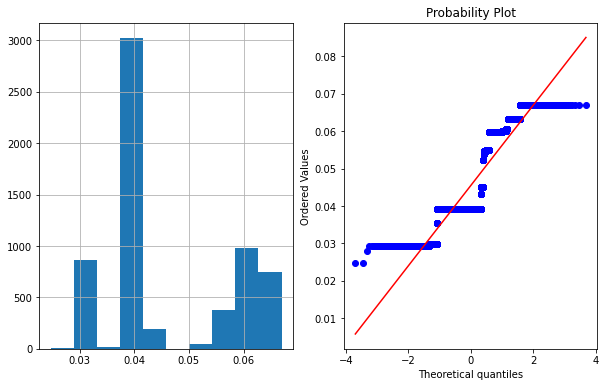

In [363]:
plot_data(data,'xxx')

In [364]:
#for col in numeric_features[1:]:
 #   fig = plt.figure(figsize=(9, 6))
  #  ax = fig.gca()
   # feature = (df[col])
    #feature.hist(bins=20, ax = ax)
    #ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
   # ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
   # ax.set_title(col)
# plt.show()
#Index(['travel_time', 'max_capacity', 'number_of_ticket', 'Waiting_time',
     #  'month', 'day', 'travel_from_distance', 'travel_from_time', 'Speed'],
     # dtype='object')

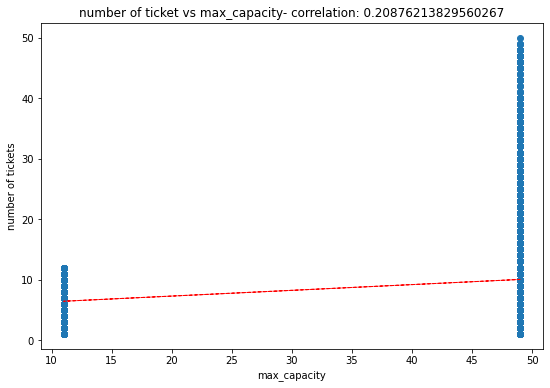

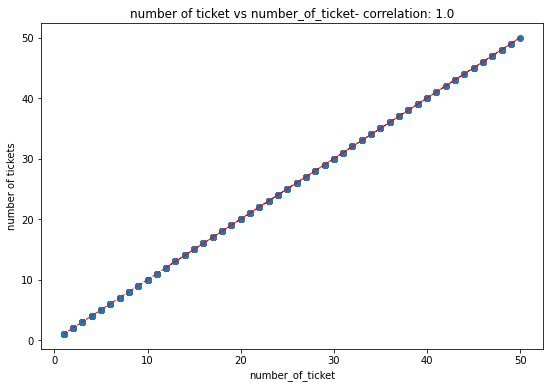

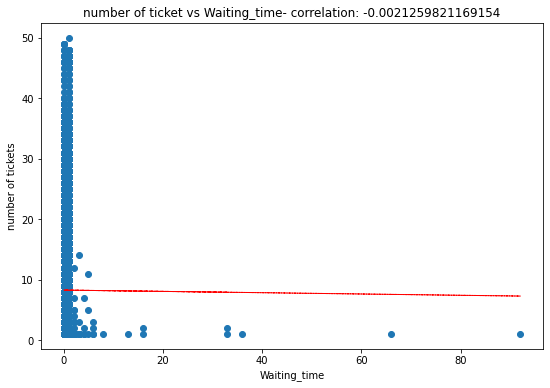

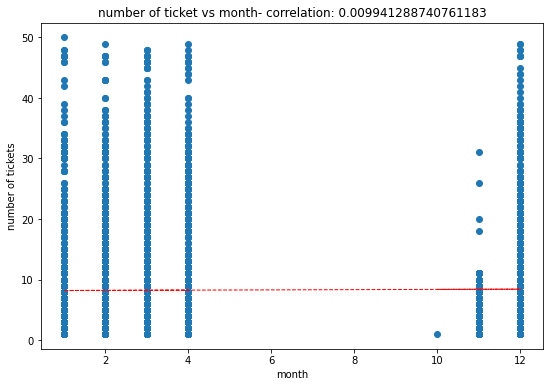

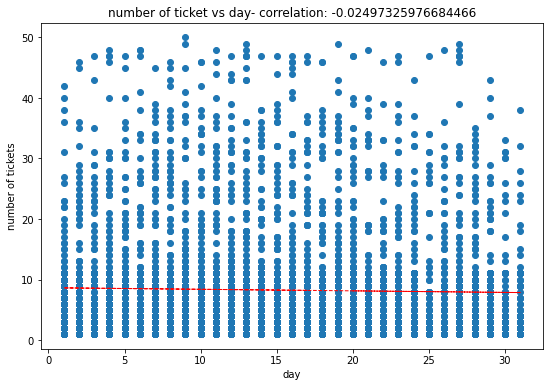

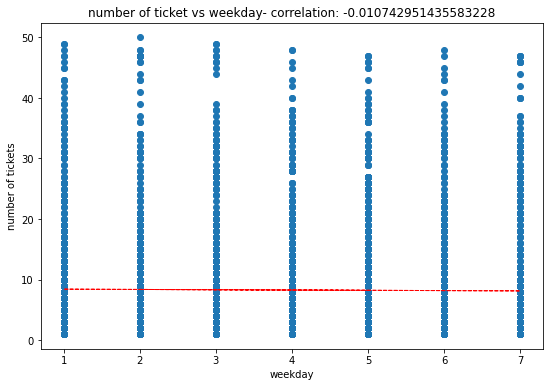

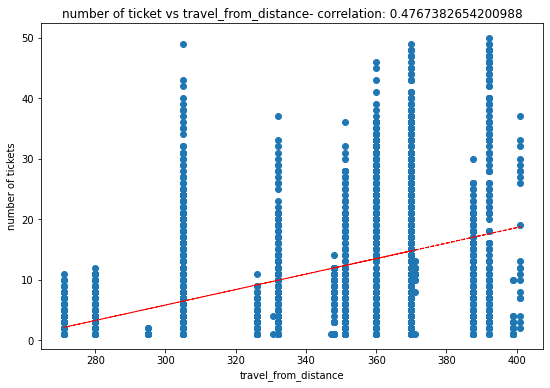

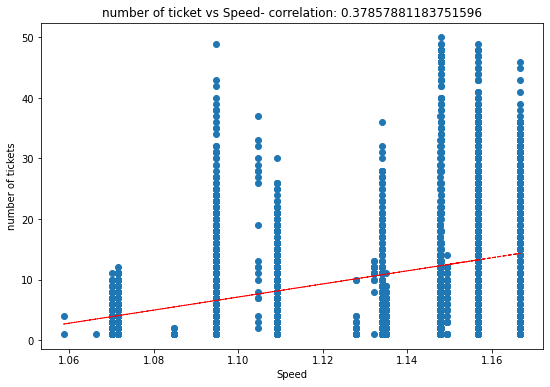

In [365]:
corr={}
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['number_of_ticket']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('number of tickets')
    ax.set_title('number of ticket vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['number_of_ticket'], 1)
    y_hat = np.poly1d(z)(df[col])
    corr[col]=correlation

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [366]:
corr.pop('number_of_ticket')
corr

{'max_capacity': 0.20876213829560267,
 'Waiting_time': -0.0021259821169154,
 'month': 0.009941288740761183,
 'day': -0.02497325976684466,
 'weekday': -0.010742951435583228,
 'travel_from_distance': 0.4767382654200988,
 'Speed': 0.37857881183751596}

<BarContainer object of 7 artists>

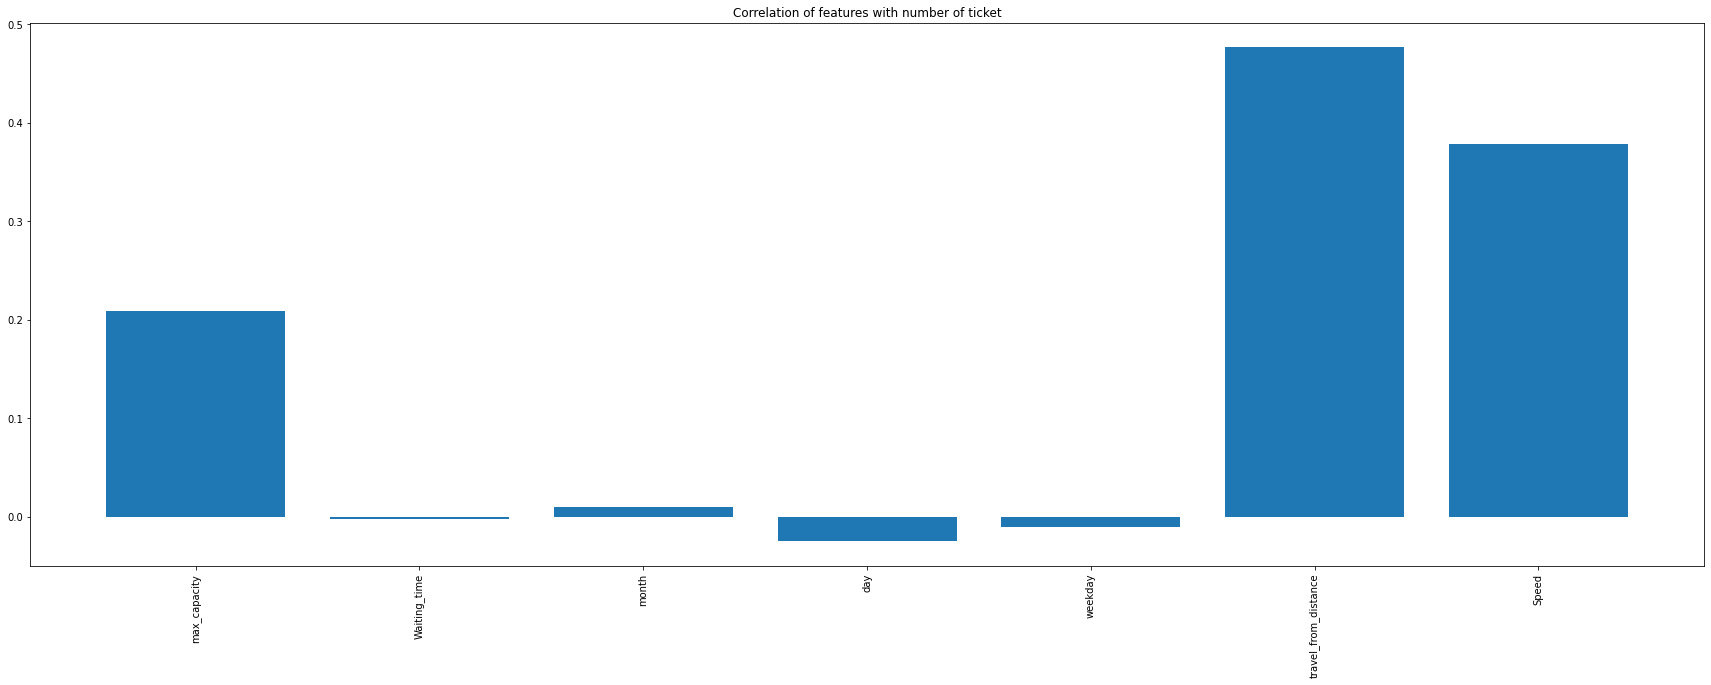

In [367]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.title('Correlation of features with number of ticket')
plt.bar(corr.keys(),corr.values())

In [368]:
Tfeatures=list(corr.keys())

In [369]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = (df[features]).apply(zscore)

In [370]:
Y=(df['number_of_ticket'])

In [371]:
#creating test train split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4374, 6)
(1875, 6)



# Regression

In [372]:
#creating dictionaries of the regression metrics
MSE_train={}
MSE_test={}
RMSE_train={}
RMSE_test={}
R2_train={}
R2_test={}


In [373]:

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [374]:
reg.score(X_train, y_train)

0.2298876379382121

In [375]:
reg.score(X_test, y_test)

0.2817478331434605

In [376]:
reg.coef_

array([-0.93364666, -0.29467567,  0.74638137, -0.25468978,  4.79449645,
       -0.12709009])

In [377]:
list(zip(corr.keys(),reg.coef_))

[('max_capacity', -0.9336466594024089),
 ('Waiting_time', -0.2946756745810233),
 ('month', 0.7463813710612031),
 ('day', -0.2546897830568038),
 ('weekday', 4.7944964546122275),
 ('travel_from_distance', -0.12709008723157877)]

In [378]:
len(reg.coef_)

6

In [379]:
reg.intercept_

8.194768118299265

In [380]:
y_pred_train=reg.predict(X_train)

In [381]:
y_pred = reg.predict(X_test)

In [382]:
y_pred

array([14.59168613, 18.7838443 ,  1.80838693, ...,  7.16447266,
       12.72177242,  8.32310109])

In [383]:
MSE =mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
MSE_train['Linear regression']=MSE

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Linear regression']=RMSE

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train))
print("R2 :" ,r2)
R2_train['Linear regression']=r2


MSE : 56.02539619100737
RMSE : 7.485011435596299
R2 : 0.2298876379382121


In [384]:
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)
MSE_test['Linear regression']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Linear regression']=RMSE

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred))
print("R2 :" ,r2)
R2_test['Linear regression']=r2


MSE : 56.02539619100737
RMSE : 7.485011435596299
R2 : 0.2817478331434605


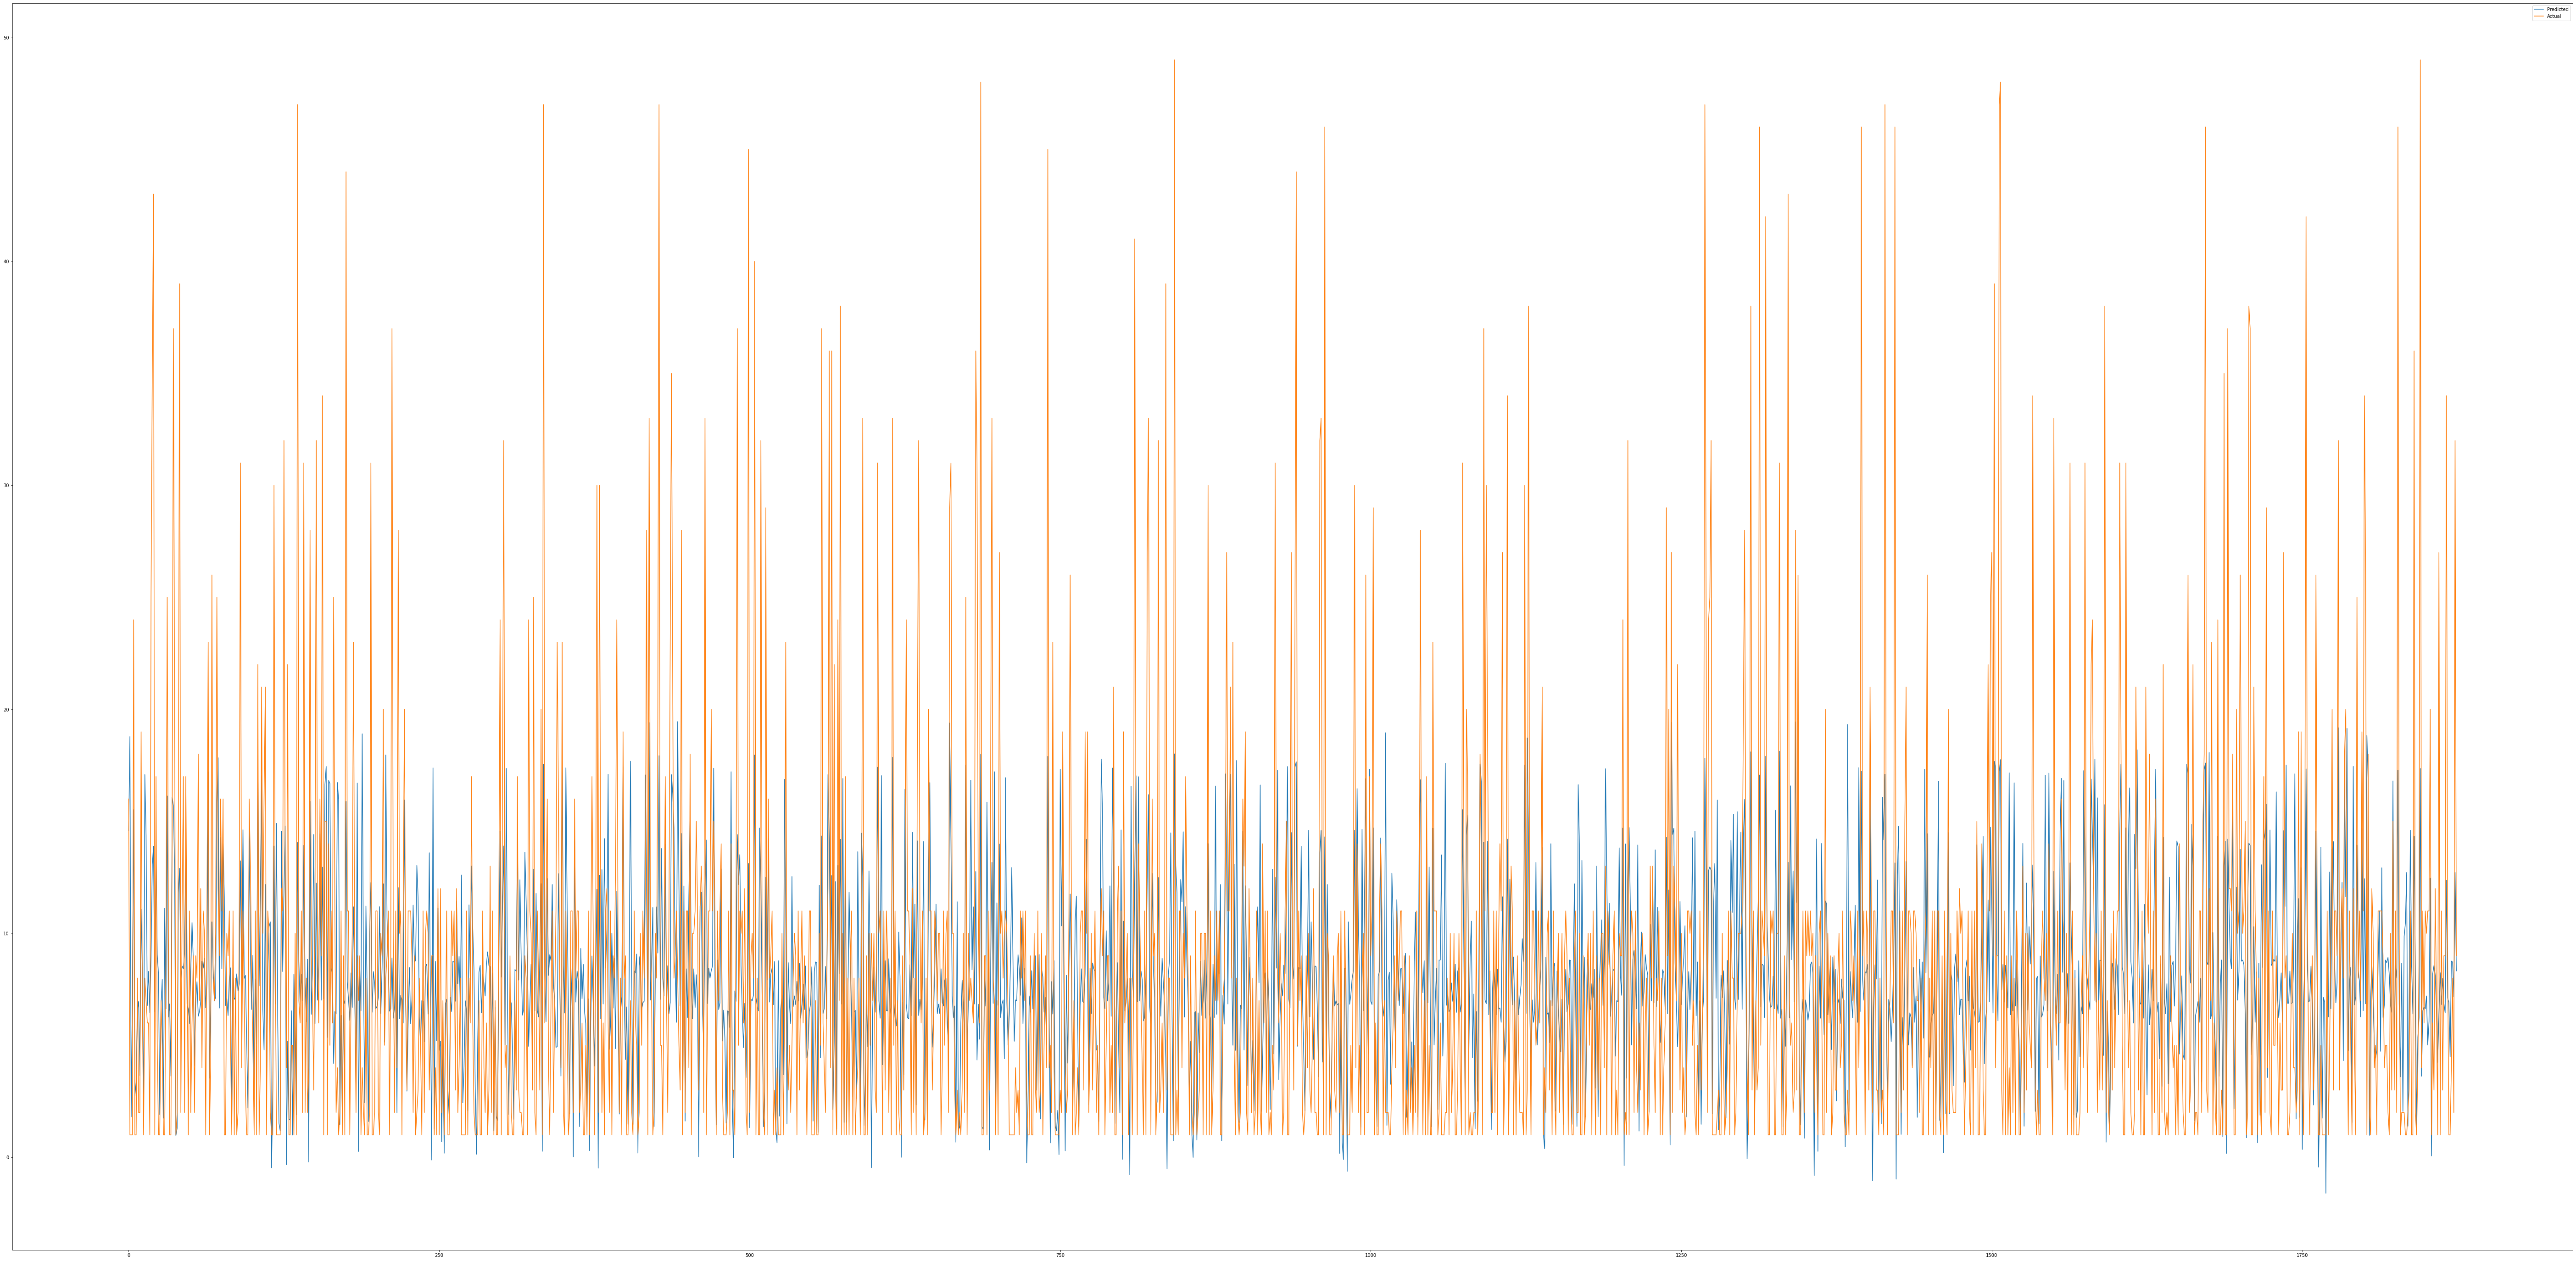

In [385]:
#plotting predicted vs acual graph
plt.figure(figsize=(100,50))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Lasso 

In [386]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 500)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=500)

In [387]:
lasso.score(X_train, y_train)

0.2287258167674623

In [388]:
lasso.score(X_test,y_test)

0.27842051310921945

In [389]:
lasso.coef_

array([-0.72701077, -0.20574311,  0.63815288, -0.15830342,  4.43050281,
        0.        ])

In [390]:
list(zip(corr.keys(),lasso.coef_))

[('max_capacity', -0.7270107674974376),
 ('Waiting_time', -0.2057431082331831),
 ('month', 0.638152877368324),
 ('day', -0.15830342199990846),
 ('weekday', 4.430502813683424),
 ('travel_from_distance', 0.0)]

In [391]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error')
lasso_regressor.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [392]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -56.495368707215746


In [393]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_train_lasso= lasso_regressor.predict(X_train)

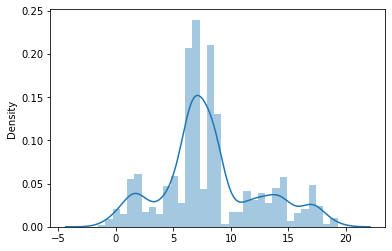

In [394]:
sns.distplot(y_pred_lasso)

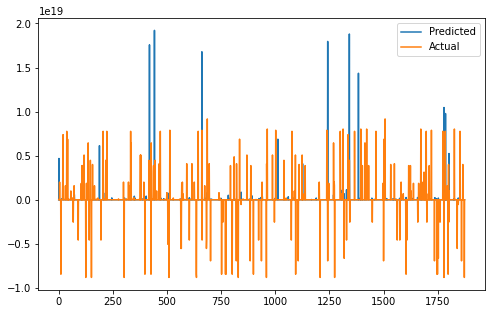

In [395]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [396]:
MSE  = mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :" , MSE)
MSE_train['Lasso']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Lasso']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train_lasso))
print("R2 :" ,r2)
R2_train['Lasso']=r2
Adjusted_R2=1-(1-r2_score((y_train), (y_pred_train_lasso)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 56.225261923069226
RMSE : 7.498350613506228
R2 : 0.22986605473839306
Adjusted R2 : 0.22880793619670092


In [397]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)
MSE_test['Lasso']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Lasso']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
R2_test['Lasso']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 56.04208641063012
RMSE : 7.486126262001605
R2 : 0.2815338625653947
Adjusted R2 : 0.2792261554858403


Ridge

In [398]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [399]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 30}

Using  {'alpha': 30}  the negative mean squared error is:  -56.558687840057964


In [400]:
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_train_ridge = ridge_regressor.predict(X_train)

In [401]:
MSE  = mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :" , MSE)
MSE_train['Ridge']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Ridge']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train_ridge))
print("R2 :" ,r2)
R2_train['Ridge']=r2
Adjusted_R2=1-(1-r2_score((y_train), (y_pred_train_ridge)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 56.22753856953908
RMSE : 7.498502421786571
R2 : 0.22983487084226129
Adjusted R2 : 0.22877670945573814


In [402]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)
MSE_test['Ridge']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Ridge']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
R2_test['Ridge']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 56.06174813716855
RMSE : 7.48743935782912
R2 : 0.28128179691926847
Adjusted R2 : 0.2789732802070177


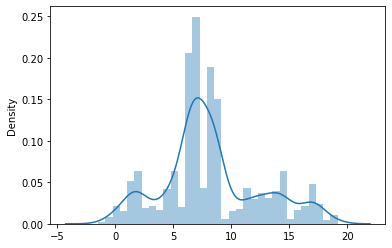

In [403]:
sns.distplot(y_pred_ridge)

Elastic Net

In [404]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [405]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [406]:
elasticnet.score(X_train, y_train)

0.2270691417960653

In [407]:
y_pred_en = elasticnet.predict(X_test)
y_pred_train_en = elasticnet.predict(X_train)

In [408]:
MSE  = mean_squared_error((y_train),(y_pred_train_en))
print("MSE :" , MSE)
MSE_train['Elasticnet']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Elasticnet']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train_en))
print("R2 :" ,r2)
R2_train['Elasticnet']=r2
Adjusted_R2=1-(1-r2_score((y_train), (y_pred_train_en)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 56.42945648393225
RMSE : 7.511954238673998
R2 : 0.2270691417960653
Adjusted R2 : 0.22600718046123047


In [409]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)
MSE_test['Elasticnet']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Elasticnet']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
R2_test['Elasticnet']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 56.536294853336614
RMSE : 7.519062099313758
R2 : 0.2751980522189128
Adjusted R2 : 0.27286999457079364


Elastic Net with Cross Validation

In [410]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [411]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.7}

Using  {'alpha': 0.01, 'l1_ratio': 0.7}  the negative mean squared error is:  -56.493882750697125


In [412]:
y_pred_elastic = elastic_regressor.predict(X_test)
y_pred__train_elastic = elastic_regressor.predict(X_train)

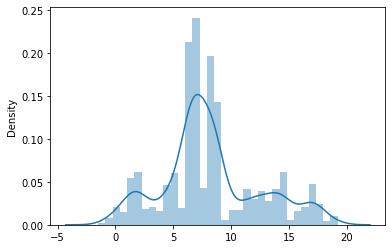

In [413]:
sns.distplot(y_pred_elastic)

In [414]:
MSE  = mean_squared_error((y_train), (y_pred__train_elastic))
print("MSE :" , MSE)
MSE_train['Elasticnet cv']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Elasticnet cv']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred__train_elastic))
print("R2 :" ,r2)
R2_train['Elasticnet cv']=r2
Adjusted_R2=1-(1-r2_score((y_train), (y_pred__train_elastic)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 56.22657793307471
RMSE : 7.498438366291658
R2 : 0.2298480289623831
Adjusted R2 : 0.22878988565433966


In [415]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)
MSE_test['Elasticnet cv']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Elasticnet cv']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
R2_test['Elasticnet cv']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 56.05306375552197
RMSE : 7.486859405352953
R2 : 0.2813931317131215
Adjusted R2 : 0.27908497260727505


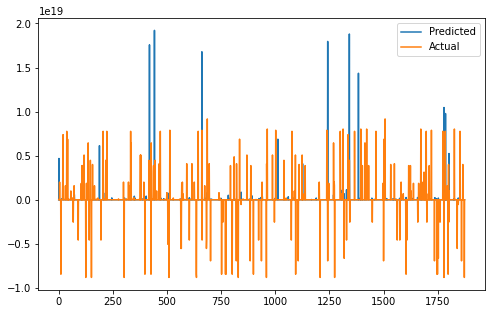

In [416]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Gradient Boosting Regression

In [417]:

# Importing the GradientBoosting algorithm
from sklearn.ensemble import GradientBoostingRegressor

In [418]:
# Training the simple gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state= 30)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=30)

In [419]:

# Predicting the values for training data
y_train_gb_reg = gb_reg.predict(X_train)


In [420]:
# Sample of predicted values of training data
y_train_gb_reg[:10]

array([7.64530407, 6.17987903, 6.58620347, 7.88182298, 7.28290157,
       5.76295362, 7.15192022, 7.28290157, 2.59343395, 9.1367716 ])

In [421]:
# Actual values of training data
y_train[:10]

1811     4
245      1
2628    11
3639    12
1456    10
3766    10
795      1
1470     9
4135     1
4259    11
Name: number_of_ticket, dtype: int64

In [422]:


# Predicting the values for test data
y_test_gb_reg = gb_reg.predict(X_test)
y_train_gb_reg = gb_reg.predict(X_train)

In [423]:

# Sample of predicted values of test data
y_test_gb_reg[:10]

array([15.57385892,  4.53378609,  2.21398054,  3.90518037, 23.30539069,
        2.64047097,  2.69373214,  7.63772668,  4.19660933,  3.37388357])

In [424]:

# Actual values of test data
y_test[:10]

2730    16
6041     1
3257     1
5073     1
1657    24
2140     1
1285     1
3071     8
2526     2
634      2
Name: number_of_ticket, dtype: int64

In [425]:


print("Train data Reg Score :",gb_reg.score(X_train,y_train))
print("Test data Reg Score :",gb_reg.score(X_test,y_test))

Train data Reg Score : 0.4194481967674627
Test data Reg Score : 0.39788505157153853


In [426]:
MSE  = mean_squared_error((y_train), (y_train_gb_reg))
print("MSE :" , MSE)
MSE_train['Gradient Boosting Regressor']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Gradient Boosting Regressor']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_train_gb_reg))
print("R2 :" ,r2)
R2_train['Gradient Boosting Regressor']=r2

MSE : 42.384415590941785
RMSE : 6.510331450159952
R2 : 0.4194481967674627


In [427]:

MSE  = mean_squared_error((y_test), (y_test_gb_reg))
print("MSE :" , MSE)
MSE_test['Gradient Boosting Regressor']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Gradient Boosting Regressor']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_test_gb_reg))
print("R2 :" ,r2)
R2_test['Gradient Boosting Regressor']=r2

MSE : 46.96641387922238
RMSE : 6.853204643028135
R2 : 0.39788505157153853


Gradient Boosting Regressor with Cross validation

In [428]:
gbr = GradientBoostingRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gbr.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [429]:
from scipy.stats import randint
rs_space={'max_depth':list(np.arange(2,20,step=2)),'learning_rate':[0.01,0.05,0.1,1,5],'n_estimators':np.arange(10,100,step=10),'subsample':np.arange(0.1,1,step=0.1)}

In [430]:
from sklearn.model_selection import RandomizedSearchCV 
gbr_random=RandomizedSearchCV(gbr,rs_space,n_iter=250,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,random_state=2)
model_random=gbr_random.fit(X_train, y_train)

In [431]:
# Viewing the best model parameters
gbr_random.best_params_
     

{'subsample': 0.8, 'n_estimators': 70, 'max_depth': 4, 'learning_rate': 0.05}

In [432]:
gbr_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=70,
                          subsample=0.8)

In [433]:
gbr_optimal_model =gbr_random.best_estimator_
y_train_pred_gbr_RandomCV = gbr_optimal_model.predict(X_train)

In [434]:
# Evaluation metrics for training data
MSE_train_gbr_best_RandomCV  = mean_squared_error(y_train, y_train_pred_gbr_RandomCV)
print("MSE for Train data :" , MSE_train_gbr_best_RandomCV)
MSE_train['Gradient Boosting Regressor cv']=MSE
RMSE_train_gbr_best_RandomCV = np.sqrt(MSE_train_gbr_best_RandomCV)
print("RMSE for Train data:" ,RMSE_train_gbr_best_RandomCV)
RMSE_train['Gradient Boosting Regressor cv']=RMSE
r2_score_train_gbr_RandomCV = r2_score(y_train, y_train_pred_gbr_RandomCV)
R2_train['Gradient Boosting Regressor cv']=r2
print("R2 for Train data:" ,r2_score_train_gbr_RandomCV)

MSE for Train data : 42.040094091728186
RMSE for Train data: 6.483833286854944
R2 for Train data: 0.4241644695878648


In [435]:

# Predicting the target values of test data using calculated best model
y_test_pred_gbr_RandomCV = gbr_optimal_model.predict(X_test)

In [436]:
# Evaluation metrics for test data
MSE_test_gbr_best_RandomCV  = mean_squared_error(y_test, y_test_pred_gbr_RandomCV)
print("MSE for Test data :" , MSE_test_gbr_best_RandomCV)
MSE_test['Gradient Boosting Regressor cv']=MSE
RMSE_test_gbr_best_RandomCV = np.sqrt(MSE_test_gbr_best_RandomCV)
print("RMSE for Test data:" ,RMSE_test_gbr_best_RandomCV)
RMSE_test['Gradient Boosting Regressor cv']=RMSE
r2_score_test_gbr_best_RandomCV = r2_score(y_test, y_test_pred_gbr_RandomCV)
R2_test['Gradient Boosting Regressor cv']=r2
print("R2 for Test data:" ,r2_score_test_gbr_best_RandomCV)

MSE for Test data : 46.35025753264278
RMSE for Test data: 6.8081023444600755
R2 for Test data: 0.40578424838479077


# XG Boost

In [437]:

# Importing Extreme Gradient Boosting
import xgboost as xgb

In [438]:
#Training basic XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [439]:
# Predicting the values for training data
y_train_xgb_reg = xgb_reg.predict(X_train)

In [440]:

# Sample of predicted values for tarining data
y_train_xgb_reg[:10]

array([7.7969494, 6.063466 , 6.6258793, 7.911711 , 7.530456 , 5.695924 ,
       7.349861 , 7.530456 , 2.434639 , 9.003973 ], dtype=float32)

In [441]:

# Actual values of training data
y_train[:10]

1811     4
245      1
2628    11
3639    12
1456    10
3766    10
795      1
1470     9
4135     1
4259    11
Name: number_of_ticket, dtype: int64

In [442]:

# Predicting the values for test data
y_test_xgb_reg = xgb_reg.predict(X_test)

In [443]:
# Sample of predicted values for test data
y_test_xgb_reg[:10]

array([15.389745 ,  6.466201 ,  2.0643482,  3.922662 , 22.451973 ,
        2.5891383,  2.85472  ,  7.6068807,  4.1545563,  3.5345085],
      dtype=float32)

In [444]:
# Actual values of test data
y_test[:10]

2730    16
6041     1
3257     1
5073     1
1657    24
2140     1
1285     1
3071     8
2526     2
634      2
Name: number_of_ticket, dtype: int64

In [445]:
print("Train data Reg Score :",xgb_reg.score(X_train,y_train))
print("Test data Reg Score :",xgb_reg.score(X_test,y_test))

Train data Reg Score : 0.41588928947675974
Test data Reg Score : 0.396195724023342


In [446]:
# Evaluation metrics for training data
MSE_train_xgb_reg  = mean_squared_error(y_train, y_train_xgb_reg)
print("MSE for Train data :" , MSE_train_xgb_reg)
MSE_train['Extreme Gradient Boosting Regressor']=MSE
RMSE_train_xgb_reg = np.sqrt(MSE_train_xgb_reg)
print("RMSE for Train data:" ,RMSE_train_xgb_reg)
RMSE_train['Extreme Gradient Boosting Regressor']=RMSE
r2_score_train_xgb_reg = r2_score(y_train, y_train_xgb_reg)
print("R2 for Train data:" ,r2_score_train_xgb_reg)
R2_train['Extreme Gradient Boosting Regressor']=r2

MSE for Train data : 42.64424116519526
RMSE for Train data: 6.530255826933219
R2 for Train data: 0.41588928947675974


In [447]:
MSE  = mean_squared_error((y_test), (y_test_xgb_reg))
print("MSE :" , MSE)
MSE_test['Extreme Gradient Boosting Regressor']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Extreme Gradient Boosting Regressor']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_test_xgb_reg))
print("R2 :" ,r2)
R2_test['Extreme Gradient Boosting Regressor']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_test_xgb_reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 47.098185490296395
RMSE : 6.8628117772744135
R2 : 0.396195724023342
Adjusted R2 : 0.39425630986067606


Extreme Gradient Boosting with Cross Validation

In [448]:
xgbr = xgb.XGBRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgbr.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


In [449]:
from sklearn.model_selection import GridSearchCV

# Fraction of columns to be randomly samples for each tree
colsample_bytree= [0.3,0.6,0.9]
eta = [0.0001, 0.001]

# Magnitude of this change in the estimates
learning_rate=  [0.05, 0.1]

# Maximum number of levels in tree
max_depth= [3,6]
min_child_weight= [7, 12]

# Number of trees in random forest
n_estimators= [70, 100]

#Fraction of observations to be selected for each tree
subsample= [0.5, 0.7, 1]

# Create the random grid
xgb_grid_params_dict = {'colsample_bytree': colsample_bytree,
         'eta': eta,
         'learning_rate': learning_rate,
         'max_depth': max_depth,
         'min_child_weight': min_child_weight,
         'n_estimators': n_estimators,
         'subsample': subsample}
pprint(xgb_grid_params_dict)

{'colsample_bytree': [0.3, 0.6, 0.9],
 'eta': [0.0001, 0.001],
 'learning_rate': [0.05, 0.1],
 'max_depth': [3, 6],
 'min_child_weight': [7, 12],
 'n_estimators': [70, 100],
 'subsample': [0.5, 0.7, 1]}


In [450]:

# First create the base model to tune
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state = 3)

# Grid Search of parameters, using 3 fold cross validation,
xgbr_grid = GridSearchCV(estimator = xgbr, param_grid = xgb_grid_params_dict, cv = 3, verbose=2, n_jobs = 1)

# Fit the Grid Search model
xgbr_grid.fit(X_train, y_train)
     

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rat

GridSearchCV(cv=3,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=3),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.3, 0.6, 0.9],
                         'eta': [0.0001, 0.001], 'learning_rate': [0.05, 0.1],
                         'max_depth': [3, 6], 'min_child_weight': [7, 12],
                         'n_estimators': [70, 100],
                         'subsample': [0.5, 0.7, 1]},
             verbose=2)

In [451]:
# Viewing the best paramters for the optimal model
xgbr_grid.best_params_

{'colsample_bytree': 0.6,
 'eta': 0.0001,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 12,
 'n_estimators': 100,
 'subsample': 0.7}

In [452]:
xgbr_grid.best_estimator_


XGBRegressor(colsample_bytree=0.6, eta=0.0001, learning_rate=0.05, max_depth=6,
             min_child_weight=12, objective='reg:squarederror', random_state=3,
             subsample=0.7)

In [453]:

# Testing the optimal model with training data
xgbr_optimal_model =xgbr_grid.best_estimator_
y_train_pred_xgbr_gridCV = xgbr_optimal_model.predict(X_train)

In [454]:
#Evaluation metrics of the model for training data
MSE_train_xgbr_best_gridCV  = mean_squared_error(y_train, y_train_pred_xgbr_gridCV)
print("MSE for Train data :" , MSE_train_xgbr_best_gridCV)
MSE_train['Extreme Gradient Boosting Regressor CV']=MSE_train_xgbr_best_gridCV
RMSE_train_xgbr_best_gridCV = np.sqrt(MSE_train_xgbr_best_gridCV)
print("RMSE for Train data:" ,RMSE_train_xgbr_best_gridCV)
RMSE_train['Extreme Gradient Boosting Regressor CV']=RMSE_train_xgbr_best_gridCV

r2_score_train_xgbr_gridCV = r2_score(y_train, y_train_pred_xgbr_gridCV)
print("R2 for Train data:" ,r2_score_train_xgbr_gridCV)
R2_train['Extreme Gradient Boosting Regressor CV']=r2_score_train_xgbr_gridCV


MSE for Train data : 40.004426600686536
RMSE for Train data: 6.324905264166929
R2 for Train data: 0.4520476057884888


In [455]:

# Testing the optimal model with training data
y_test_pred_xgbr_gridCV = xgbr_optimal_model.predict(X_test)
     

In [456]:
#Evaluation metrics of the model for test data
MSE_test_xgbr_best_gridCV  = mean_squared_error(y_test, y_test_pred_xgbr_gridCV)
print("MSE for Test data :" , MSE_test_xgbr_best_gridCV)
MSE_test['Extreme Gradient Boosting Regressor CV']=MSE_test_xgbr_best_gridCV
RMSE_test_xgbr_best_gridCV = np.sqrt(MSE_test_xgbr_best_gridCV)
print("RMSE for Test data:" ,RMSE_test_xgbr_best_gridCV)
RMSE_test['Extreme Gradient Boosting Regressor CV']=RMSE_test_xgbr_best_gridCV

r2_score_test_xgbr_best_gridCV = r2_score(y_test, y_test_pred_xgbr_gridCV)
print("R2 for Test data:" ,r2_score_test_xgbr_best_gridCV)
R2_test['Extreme Gradient Boosting Regressor CV']=r2_score_test_xgbr_best_gridCV


MSE for Test data : 46.89966788515273
RMSE for Test data: 6.84833321948872
R2 for Test data: 0.3987407430637695


Decission Tree Regressor

In [457]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dtree = DecisionTreeRegressor(random_state = 30) 
  
# fit the regressor with X and Y data
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=30)

In [458]:
print("Train data Reg Score :",dtree.score(X_train,y_train))
print("Test data Reg Score :",dtree.score(X_test,y_test))

Train data Reg Score : 0.7932308486847794
Test data Reg Score : -0.06242019092996132


In [459]:
# Predicting the values for test data
y_pred_dtree = dtree.predict(X_train)

In [460]:
MSE  = mean_squared_error((y_train), (y_pred_dtree))
print("MSE :" , MSE)
MSE_train['Decission Tree']=MSE

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Decission Tree']=RMSE

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_dtree))
print("R2 :" ,r2)
R2_train['Decission Tree']=r2

Adjusted_R2=1-(1-r2_score((y_train), (y_pred_dtree)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 15.095620394137923
RMSE : 3.8853082753029935
R2 : 0.7932308486847794
Adjusted R2 : 0.7929467600866821


In [461]:
# Predicting the values for test data
y_pred_dtree = dtree.predict(X_test)

In [462]:
MSE  = mean_squared_error((y_test), (y_pred_dtree))
print("MSE :" , MSE)
MSE_test['Decission Tree']=MSE

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Decission Tree']=RMSE

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_dtree))
print("R2 :" ,r2)
R2_test['Decission Tree']=r2

Adjusted_R2=1-(1-r2_score((y_test), (y_pred_dtree)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 82.8713296872873
RMSE : 9.103369139350953
R2 : -0.06242019092996132
Adjusted R2 : -0.06583267548326965


# Random Forest

In [463]:

# Importing the RandomForest packages
from sklearn.ensemble import RandomForestRegressor

In [464]:
# Training the simple gradient Boosting model
randf_reg = RandomForestRegressor(criterion='squared_error', max_leaf_nodes=10, random_state=30)
randf_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, random_state=30)

In [465]:

# Predicting the values for tarining data
y_train_rf_reg = randf_reg.predict(X_train)

In [466]:

# Sample of predicted values of training data
y_train_rf_reg[:10]

array([7.58300046, 7.56931635, 7.56931635, 7.60792353, 7.56931635,
       4.78421914, 4.78421914, 7.56931635, 2.38724454, 7.62160764])

In [467]:
# Actual values of test data
y_test[:10]

2730    16
6041     1
3257     1
5073     1
1657    24
2140     1
1285     1
3071     8
2526     2
634      2
Name: number_of_ticket, dtype: int64

In [468]:

# Predicting the values for test data
y_test_rf_reg = randf_reg.predict(X_test)

In [469]:

# Sample of predicted values of test data
y_test_rf_reg[:10]

array([16.37882445,  8.6957123 ,  2.38724454,  7.56931635, 19.83708863,
        2.38724454,  2.38724454,  7.58300046,  4.7509102 ,  2.38724454])

In [470]:

print("Train data Reg Score :",randf_reg.score(X_train,y_train))
print("Test data Reg Score :",randf_reg.score(X_test,y_test))

Train data Reg Score : 0.3678534620050905
Test data Reg Score : 0.37543956882913787


In [471]:
MSE  = mean_squared_error((y_train), (y_train_rf_reg))
print("MSE :" , MSE)
MSE_train['Random Forest']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Random Forest']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_train_rf_reg))
print("R2 :" ,r2)
R2_train['Random Forest']=r2

Adjusted_R2=1-(1-r2_score((y_train), (y_train_rf_reg)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 46.15119862097721
RMSE : 6.7934673489299415
R2 : 0.3678534620050905
Adjusted R2 : 0.3669849300087613


In [472]:
MSE  = mean_squared_error((y_test), (y_test_rf_reg))
print("MSE :" , MSE)
MSE_test['Random Forest']=MSE

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Random Forest']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_test_rf_reg))
print("R2 :" ,r2)
R2_test['Random Forest']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_test_rf_reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 48.71721550763234
RMSE : 6.979771880773206
R2 : 0.37543956882913787
Adjusted R2 : 0.373433486073771


Random Forest with cross validation

In [473]:
rfr = RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [474]:
# Importing the GridSearch Cross Valiation Packages
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 800, num = 3)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 2)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [5, 12]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the parameters grid
grid_params_dict = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(grid_params_dict)

{'bootstrap': [True, False],
 'max_depth': [40, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 12],
 'n_estimators': [400, 600, 800]}


In [475]:
# First create the base model to tune
rfr = RandomForestRegressor()

# Grid Search of parameters, using 3 fold cross validation, 
rf_gridCV = GridSearchCV(estimator = rfr, param_grid = grid_params_dict, cv = 3, verbose=2, n_jobs = 1)

# Fit the random search model
rf_gridCV.fit(X, Y)     

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.9s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.8s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.6s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; tota

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [40, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 12],
                         'n_estimators': [400, 600, 800]},
             verbose=2)

In [476]:

# Viewing the best parameters of the optimal model
rf_gridCV.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 400}

In [477]:
rf_gridCV.best_estimator_

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=12, n_estimators=400)

In [478]:
# Predicting the values of training data using the calculated optimal model
rf_grid_optimal_model =rf_gridCV.best_estimator_
y_train_pred_gridCV = rf_grid_optimal_model.predict(X_train)

In [479]:
# Evaluation metrics for training data
MSE_train_rf_reg_best_gridCV  = mean_squared_error(y_train, y_train_pred_gridCV)
print("MSE for Train data :" , MSE_train_rf_reg_best_gridCV)
MSE_train['Random Forest cv']=MSE_train_rf_reg_best_gridCV
RMSE_train_rf_reg_best_gridCV = np.sqrt(MSE_train_rf_reg_best_gridCV)
print("RMSE for Train data:" ,RMSE_train_rf_reg_best_gridCV)
RMSE_train['Random Forest cv']=RMSE_train_rf_reg_best_gridCV
#MAE_train_rf_reg_best_gridCV = mean_absolute_error(y_train, y_train_pred_gridCV)
#print("MAE for Train data:" ,MAE_train_rf_reg_best_gridCV)

#MAPE_train_rf_reg_best_gridCV = mean_absolute_percentage_error(y_train, y_train_pred_gridCV)
#print("MAPE for Train data:" ,MAPE_train_rf_reg_best_gridCV)

r2_score_train_rf_reg_gridCV = r2_score(y_train, y_train_pred_gridCV)
print("R2 for Train data:" ,r2_score_train_rf_reg_gridCV)
R2_train['Random Forest cv']=r2_score_train_rf_reg_gridCV
#print("Adjusted R2 for Train data: " ,adjusted_r2(X_train, r2_score_train_rf_reg_gridCV))

MSE for Train data : 34.87063997420207
RMSE for Train data: 5.905136744750461
R2 for Train data: 0.5223665907706389


In [480]:

# Predicting the target values of test data using calculated best model
y_test_pred_gridCV = rf_grid_optimal_model.predict(X_test)

In [481]:

# Evaluation metrics for test data
MSE_test_rf_reg_best_gridCV  = mean_squared_error(y_test, y_test_pred_gridCV)
print("MSE for Test data :" , MSE_test_rf_reg_best_gridCV)
MSE_test['Random Forest cv']=MSE_test_rf_reg_best_gridCV
RMSE_test_rf_reg_best_gridCV = np.sqrt(MSE_test_rf_reg_best_gridCV)
print("RMSE for Test data:" ,RMSE_test_rf_reg_best_gridCV)
RMSE_test['Random Forest cv']=RMSE_test_rf_reg_best_gridCV
r2_score_test_rf_reg_best_gridCV = r2_score(y_test, y_test_pred_gridCV)
print("R2 for Test data:" ,r2_score_test_rf_reg_best_gridCV)
R2_test['Random Forest cv']=r2_score_test_rf_reg_best_gridCV

MSE for Test data : 36.198162653304394
RMSE for Test data: 6.016490891982169
R2 for Test data: 0.5359352984614054


In [482]:
R2_test

{'Linear regression': 0.2817478331434605,
 'Lasso': 0.2815338625653947,
 'Ridge': 0.28128179691926847,
 'Elasticnet': 0.2751980522189128,
 'Elasticnet cv': 0.2813931317131215,
 'Gradient Boosting Regressor': 0.39788505157153853,
 'Gradient Boosting Regressor cv': 0.39788505157153853,
 'Extreme Gradient Boosting Regressor': 0.396195724023342,
 'Extreme Gradient Boosting Regressor CV': 0.3987407430637695,
 'Decission Tree': -0.06242019092996132,
 'Random Forest': 0.37543956882913787,
 'Random Forest cv': 0.5359352984614054}

#Conclusion

we will compare different algorithms using MSE, RMSE and R2 score

In [483]:
MSE_train

{'Linear regression': 56.02539619100737,
 'Lasso': 56.225261923069226,
 'Ridge': 56.22753856953908,
 'Elasticnet': 56.42945648393225,
 'Elasticnet cv': 56.22657793307471,
 'Gradient Boosting Regressor': 42.384415590941785,
 'Gradient Boosting Regressor cv': 46.96641387922238,
 'Extreme Gradient Boosting Regressor': 46.96641387922238,
 'Extreme Gradient Boosting Regressor CV': 40.004426600686536,
 'Decission Tree': 15.095620394137923,
 'Random Forest': 46.15119862097721,
 'Random Forest cv': 34.87063997420207}

In [484]:
MSE_test

{'Linear regression': 56.02539619100737,
 'Lasso': 56.04208641063012,
 'Ridge': 56.06174813716855,
 'Elasticnet': 56.536294853336614,
 'Elasticnet cv': 56.05306375552197,
 'Gradient Boosting Regressor': 46.96641387922238,
 'Gradient Boosting Regressor cv': 46.96641387922238,
 'Extreme Gradient Boosting Regressor': 47.098185490296395,
 'Extreme Gradient Boosting Regressor CV': 46.89966788515273,
 'Decission Tree': 82.8713296872873,
 'Random Forest': 48.71721550763234,
 'Random Forest cv': 36.198162653304394}

In [485]:
MSE = pd.DataFrame(list(zip(MSE_train.values(), MSE_test.values())),columns =['train', 'test'])

In [486]:
MSE

train       test
0   56.025396  56.025396
1   56.225262  56.042086
2   56.227539  56.061748
3   56.429456  56.536295
4   56.226578  56.053064
5   42.384416  46.966414
6   46.966414  46.966414
7   46.966414  47.098185
8   40.004427  46.899668
9   15.095620  82.871330
10  46.151199  48.717216
11  34.870640  36.198163

In [487]:
RMSE = pd.DataFrame(list(zip(RMSE_train.values(), RMSE_test.values())),columns =['train', 'test'])

In [488]:
RMSE

train      test
0   7.485011  7.485011
1   7.498351  7.486126
2   7.498502  7.487439
3   7.511954  7.519062
4   7.498438  7.486859
5   6.510331  6.853205
6   6.853205  6.853205
7   6.853205  6.862812
8   6.324905  6.848333
9   3.885308  9.103369
10  6.793467  6.979772
11  5.905137  6.016491

In [489]:
R2 = pd.DataFrame(list(zip(R2_train.values(), R2_test.values())),columns =['train', 'test'])

In [490]:
R2

train      test
0   0.229888  0.281748
1   0.229866  0.281534
2   0.229835  0.281282
3   0.227069  0.275198
4   0.229848  0.281393
5   0.419448  0.397885
6   0.397885  0.397885
7   0.397885  0.396196
8   0.452048  0.398741
9   0.793231 -0.062420
10  0.367853  0.375440
11  0.522367  0.535935

In [491]:
df1=pd.DataFrame(MSE_train.keys())

In [492]:
df1

0
0                        Linear regression
1                                    Lasso
2                                    Ridge
3                               Elasticnet
4                            Elasticnet cv
5              Gradient Boosting Regressor
6           Gradient Boosting Regressor cv
7      Extreme Gradient Boosting Regressor
8   Extreme Gradient Boosting Regressor CV
9                           Decission Tree
10                           Random Forest
11                        Random Forest cv

In [493]:
MSE.columns = pd.MultiIndex.from_product([['MSE'], MSE.columns])
RMSE.columns = pd.MultiIndex.from_product([['RMSE'], RMSE.columns])
R2.columns = pd.MultiIndex.from_product([['R2'], R2.columns])
new_df=pd.concat([MSE, RMSE,R2], axis = 1)

In [494]:
new_df

MSE                 RMSE                  R2          
        train       test     train      test     train      test
0   56.025396  56.025396  7.485011  7.485011  0.229888  0.281748
1   56.225262  56.042086  7.498351  7.486126  0.229866  0.281534
2   56.227539  56.061748  7.498502  7.487439  0.229835  0.281282
3   56.429456  56.536295  7.511954  7.519062  0.227069  0.275198
4   56.226578  56.053064  7.498438  7.486859  0.229848  0.281393
5   42.384416  46.966414  6.510331  6.853205  0.419448  0.397885
6   46.966414  46.966414  6.853205  6.853205  0.397885  0.397885
7   46.966414  47.098185  6.853205  6.862812  0.397885  0.396196
8   40.004427  46.899668  6.324905  6.848333  0.452048  0.398741
9   15.095620  82.871330  3.885308  9.103369  0.793231 -0.062420
10  46.151199  48.717216  6.793467  6.979772  0.367853  0.375440
11  34.870640  36.198163  5.905137  6.016491  0.522367  0.535935

In [495]:
new_df['Algorithm']=df1

In [496]:
new_df

MSE                 RMSE                  R2            \
        train       test     train      test     train      test   
0   56.025396  56.025396  7.485011  7.485011  0.229888  0.281748   
1   56.225262  56.042086  7.498351  7.486126  0.229866  0.281534   
2   56.227539  56.061748  7.498502  7.487439  0.229835  0.281282   
3   56.429456  56.536295  7.511954  7.519062  0.227069  0.275198   
4   56.226578  56.053064  7.498438  7.486859  0.229848  0.281393   
5   42.384416  46.966414  6.510331  6.853205  0.419448  0.397885   
6   46.966414  46.966414  6.853205  6.853205  0.397885  0.397885   
7   46.966414  47.098185  6.853205  6.862812  0.397885  0.396196   
8   40.004427  46.899668  6.324905  6.848333  0.452048  0.398741   
9   15.095620  82.871330  3.885308  9.103369  0.793231 -0.062420   
10  46.151199  48.717216  6.793467  6.979772  0.367853  0.375440   
11  34.870640  36.198163  5.905137  6.016491  0.522367  0.535935   

                                 Algorithm  
                                            
0                        Linear regression  
1                                    Lasso  
2                                    Ridge  
3                               Elasticnet  
4                            Elasticnet cv  
5              Gradient Boosting Regressor  
6           Gradient Boosting Regressor cv  
7      Extreme Gradient Boosting Regressor  
8   Extreme Gradient Boosting Regressor CV  
9                           Decission Tree  
10                           Random Forest  
11                        Random Forest cv

In [497]:
new_df=new_df.loc[:,['Algorithm','MSE','RMSE','R2']]

In [498]:
new_df

Algorithm        MSE                 RMSE  \
                                                train       test     train   
0                        Linear regression  56.025396  56.025396  7.485011   
1                                    Lasso  56.225262  56.042086  7.498351   
2                                    Ridge  56.227539  56.061748  7.498502   
3                               Elasticnet  56.429456  56.536295  7.511954   
4                            Elasticnet cv  56.226578  56.053064  7.498438   
5              Gradient Boosting Regressor  42.384416  46.966414  6.510331   
6           Gradient Boosting Regressor cv  46.966414  46.966414  6.853205   
7      Extreme Gradient Boosting Regressor  46.966414  47.098185  6.853205   
8   Extreme Gradient Boosting Regressor CV  40.004427  46.899668  6.324905   
9                           Decission Tree  15.095620  82.871330  3.885308   
10                           Random Forest  46.151199  48.717216  6.793467   
11                        Random Forest cv  34.870640  36.198163  5.905137   

                    R2            
        test     train      test  
0   7.485011  0.229888  0.281748  
1   7.486126  0.229866  0.281534  
2   7.487439  0.229835  0.281282  
3   7.519062  0.227069  0.275198  
4   7.486859  0.229848  0.281393  
5   6.853205  0.419448  0.397885  
6   6.853205  0.397885  0.397885  
7   6.862812  0.397885  0.396196  
8   6.848333  0.452048  0.398741  
9   9.103369  0.793231 -0.062420  
10  6.979772  0.367853  0.375440  
11  6.016491  0.522367  0.535935

Conclusion:
    From the above regression algorithms we can find that Random Forest with cross validation with best parameters of {'bootstrap': True,'max_depth': 40,'max_features': 'sqrt','min_samples_leaf': 4,'min_samples_split': 12,'n_estimators': 400} have the performed better compared to othe algorithms with a R2 score on training with 52.2367% and R2 score on test with 53.5935%. 